# Importing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/hsq_df_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/hsq_df_train.csv')

# Creating Visualizations

In [ ]:
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['Original_Quote_Date', 'Field6', 'Field10', 'Field12', 'CoverageField8', 'CoverageField9', 'SalesField7', 'PersonalField7', 'PersonalField16', 'PersonalField17', 'PersonalField18', 'PersonalField19', 'PropertyField3', 'PropertyField4', 'PropertyField5', 'PropertyField7', 'PropertyField14', 'PropertyField28', 'PropertyField30', 'PropertyField31', 'PropertyField32', 'PropertyField33', 'PropertyField34', 'PropertyField36', 'PropertyField37', 'PropertyField38', 'GeographicField63', 'GeographicField64']
Numerical columns: ['QuoteConversion_Flag', 'Field7', 'Field8', 'Field9', 'Field11', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField11A', 'CoverageField11B', 'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6

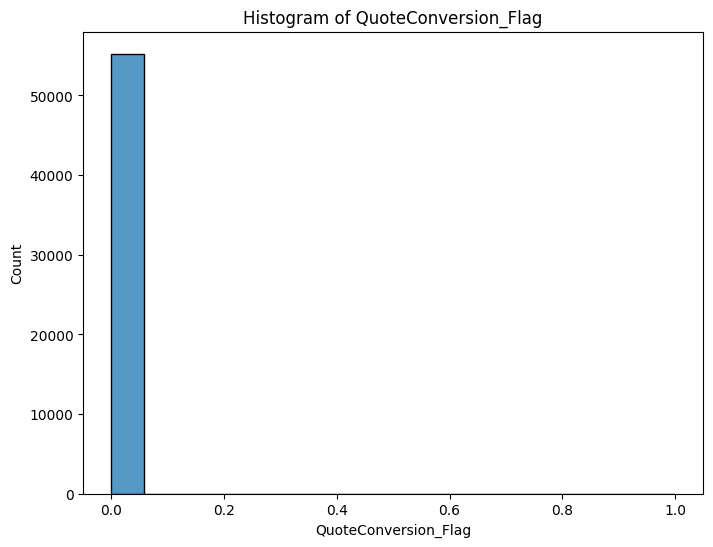

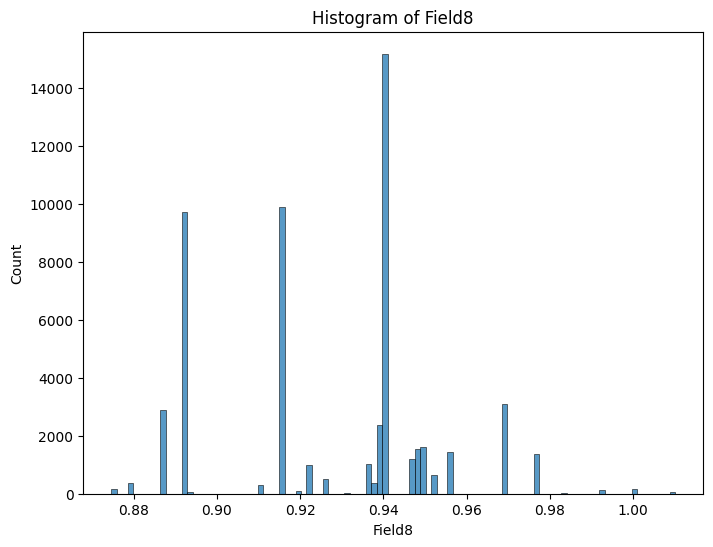

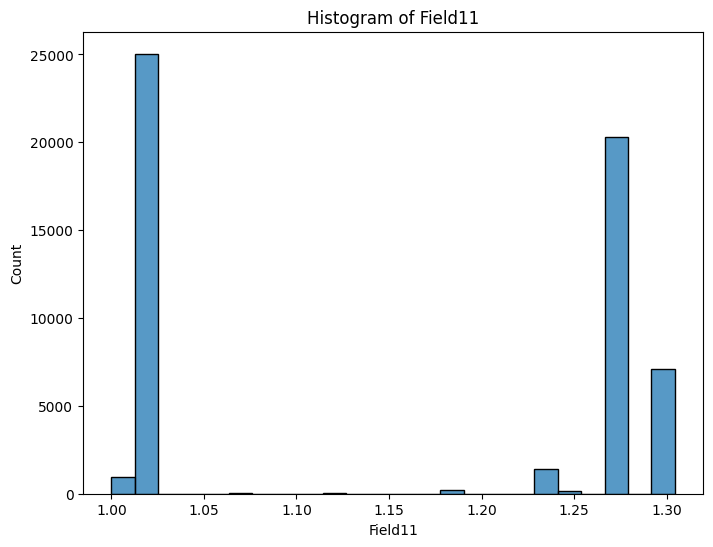

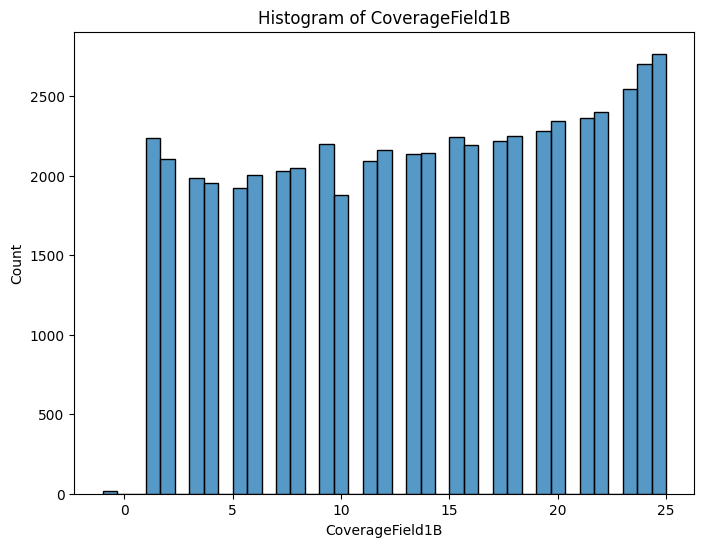

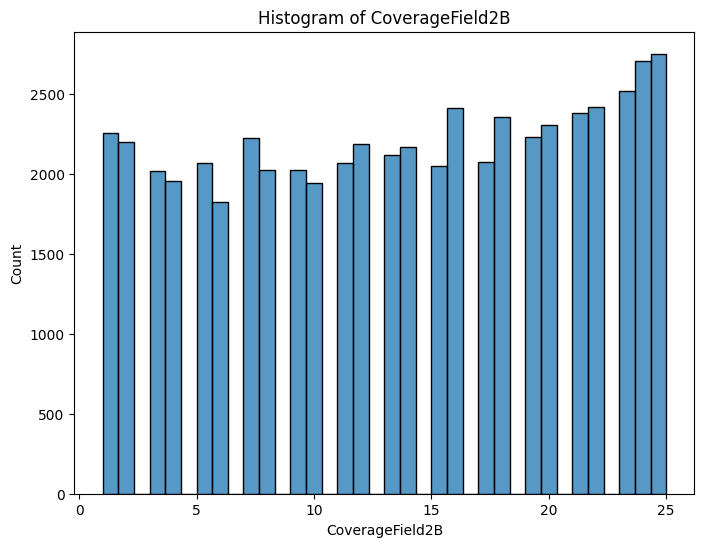

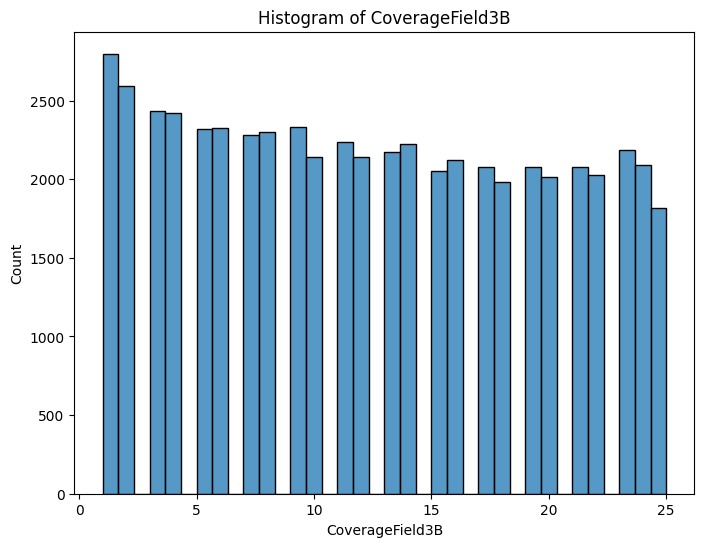

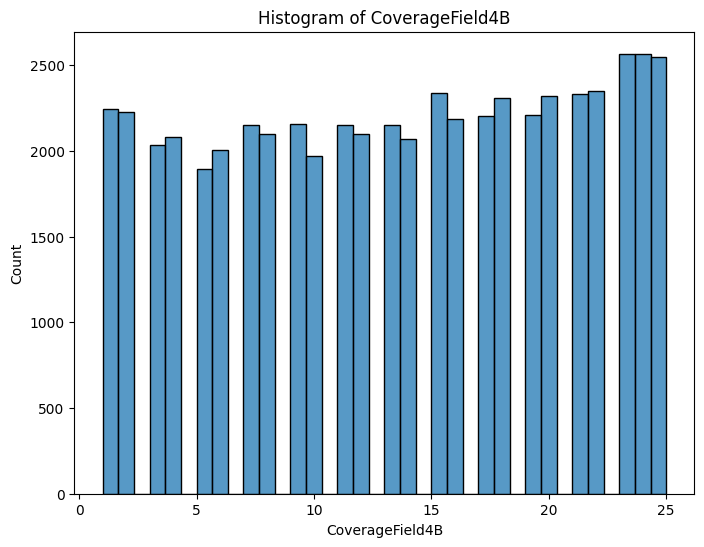

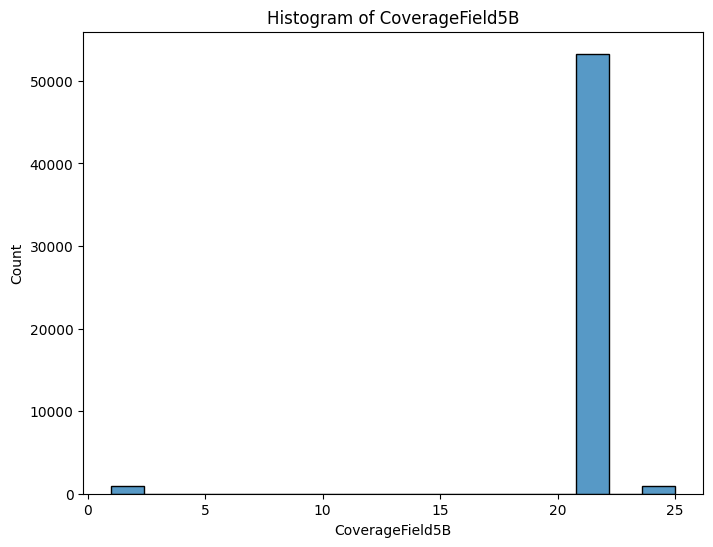

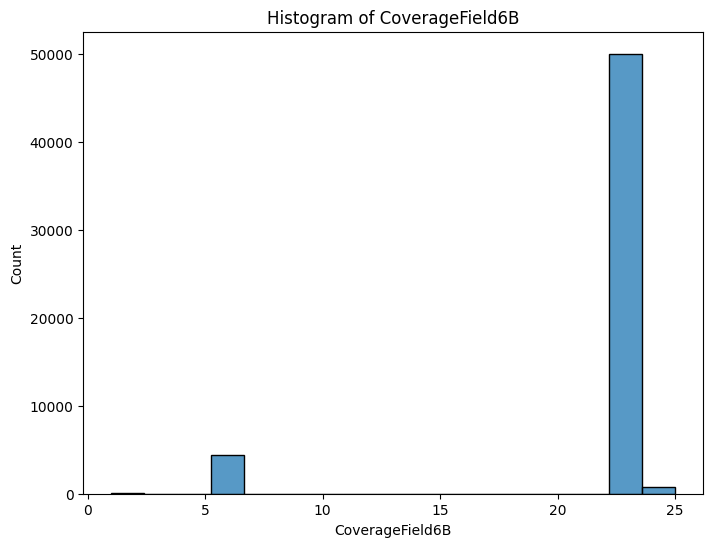

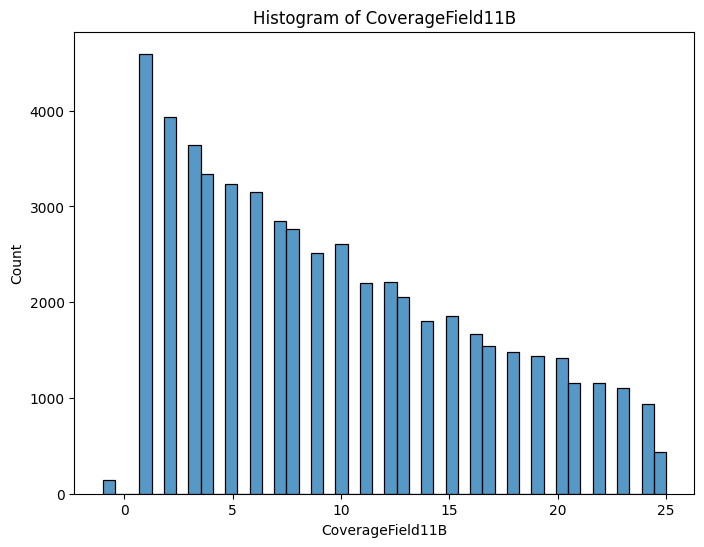

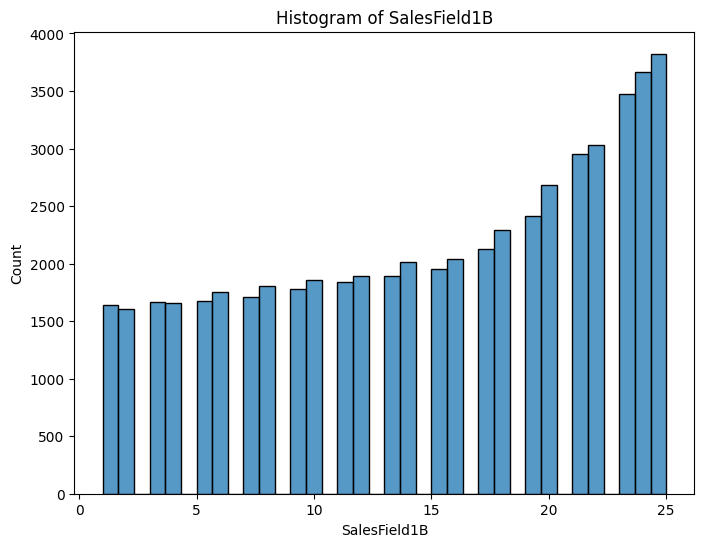

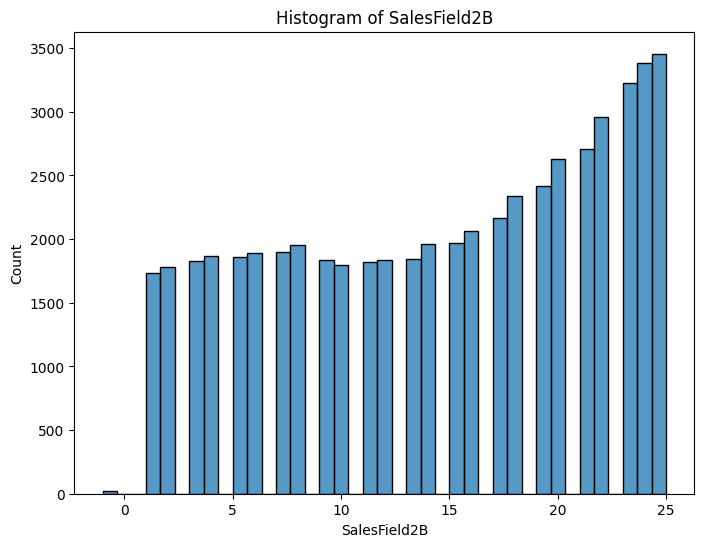

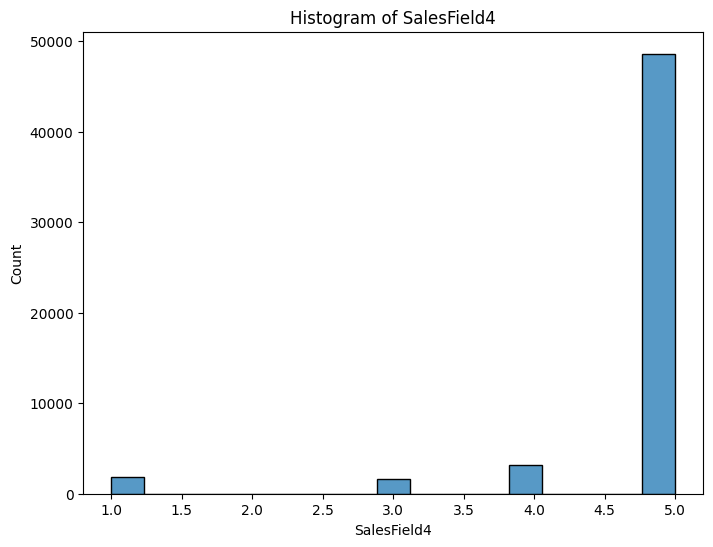

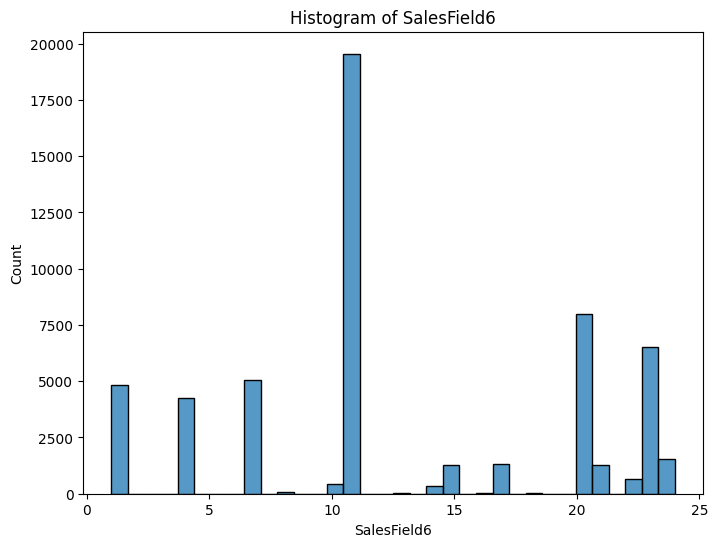

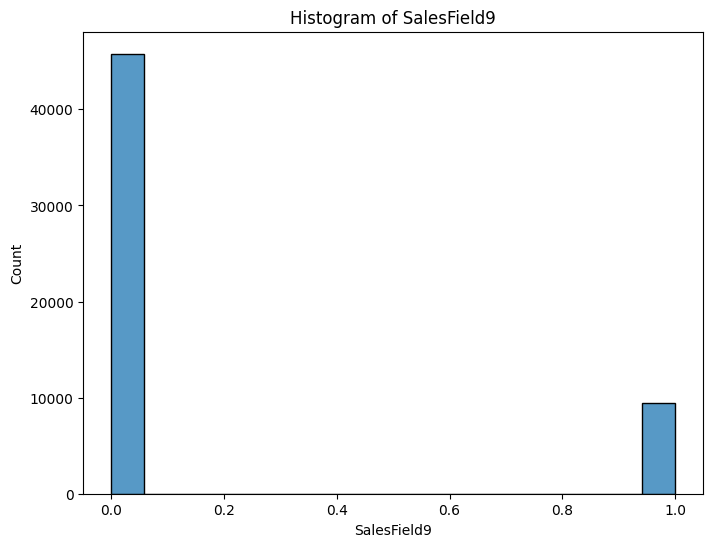

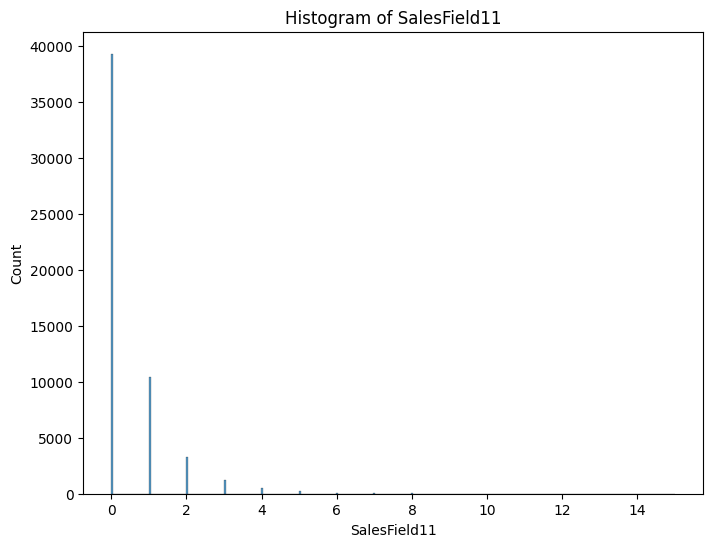

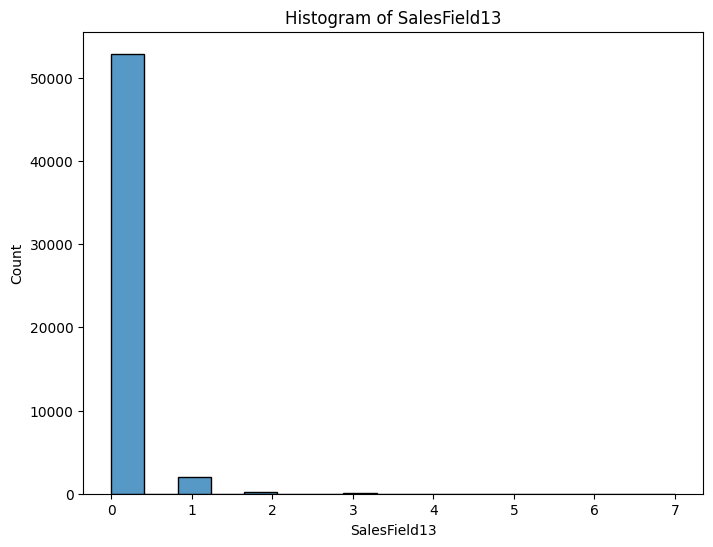

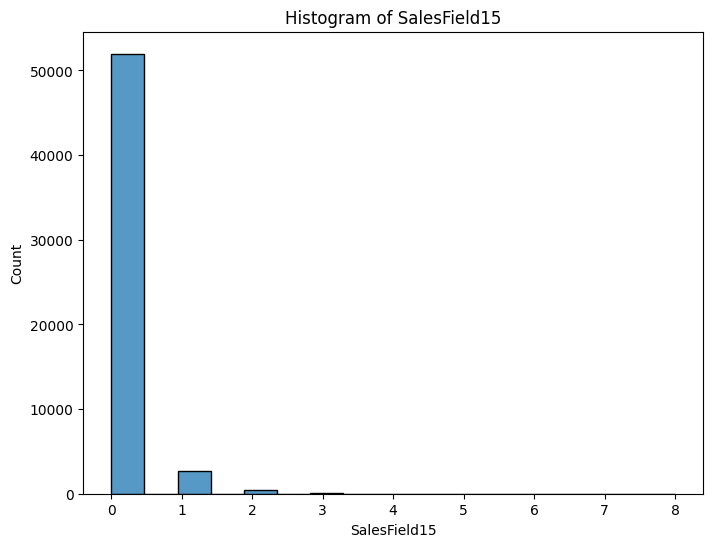

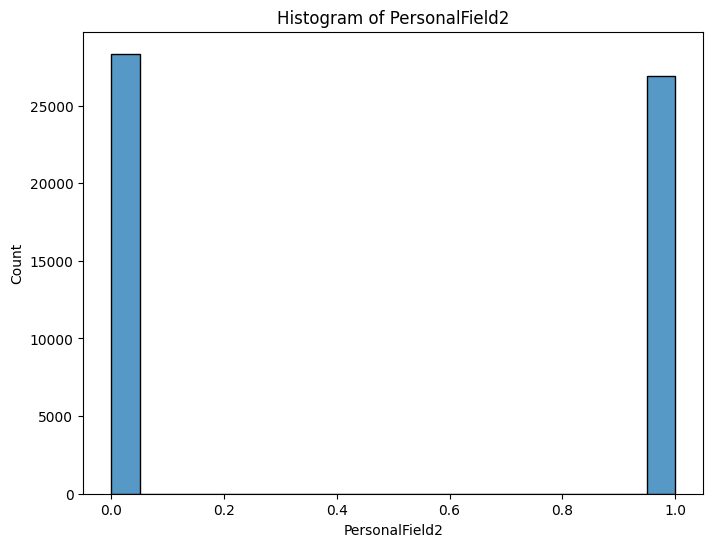

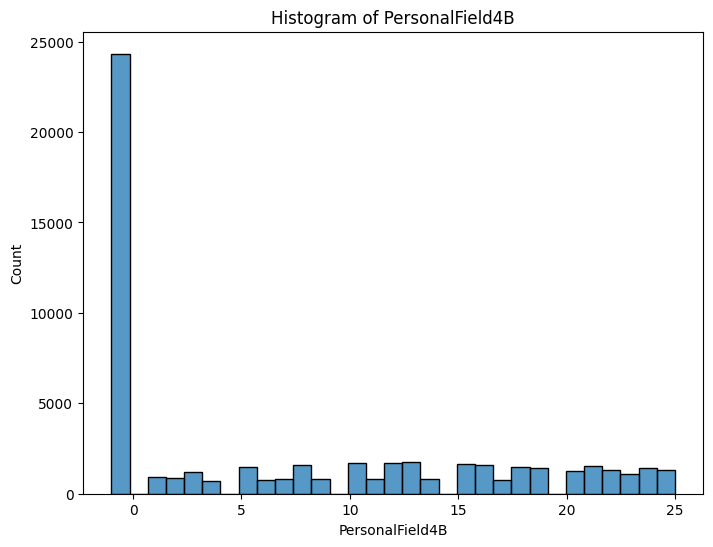

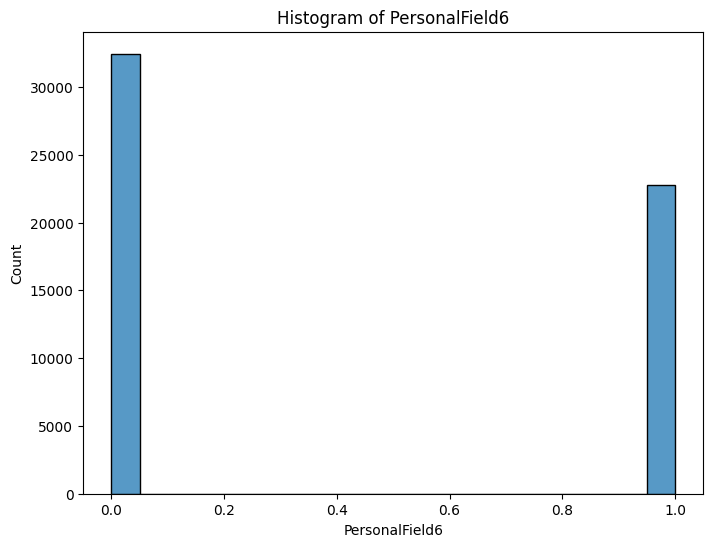

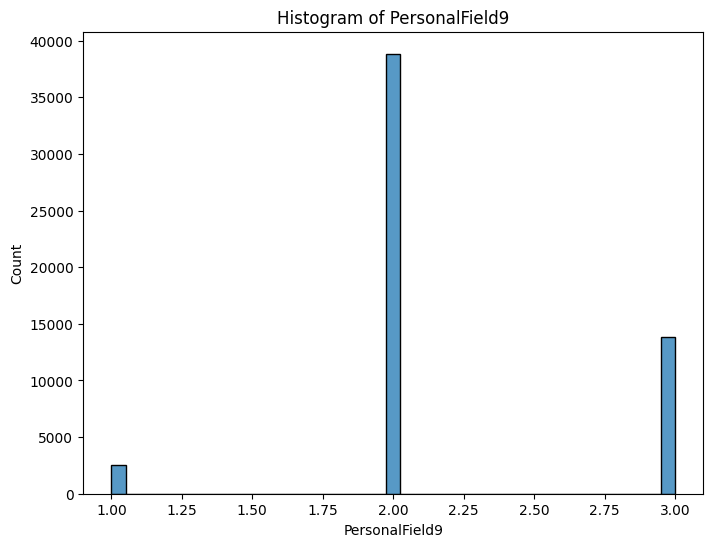

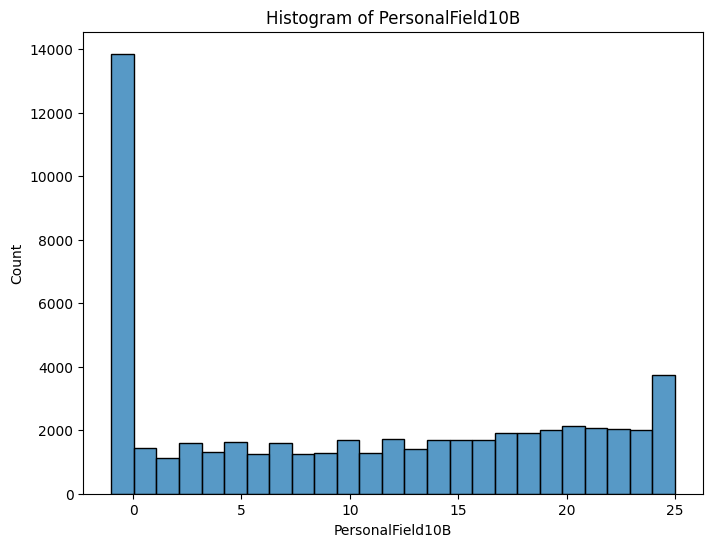

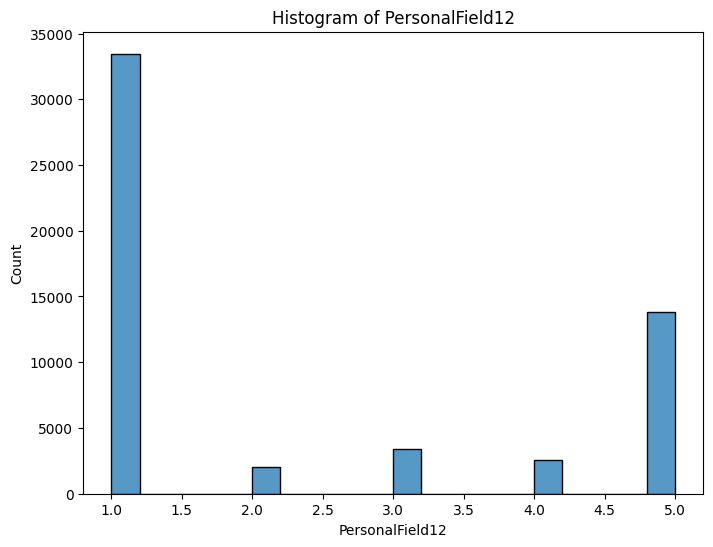

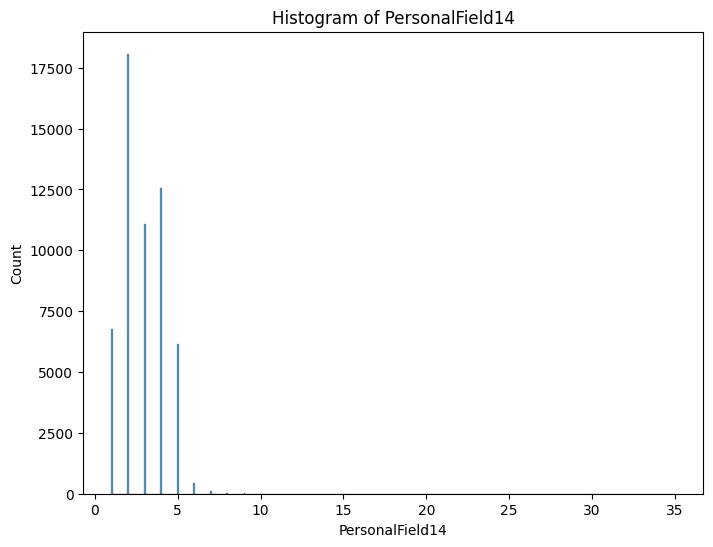

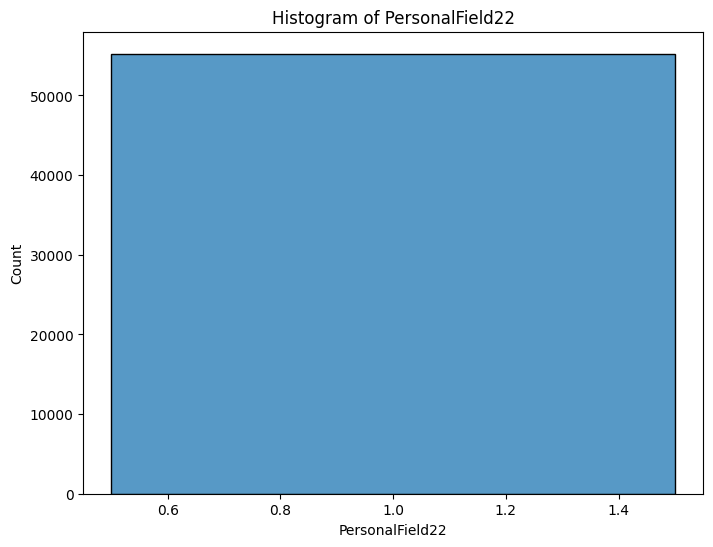

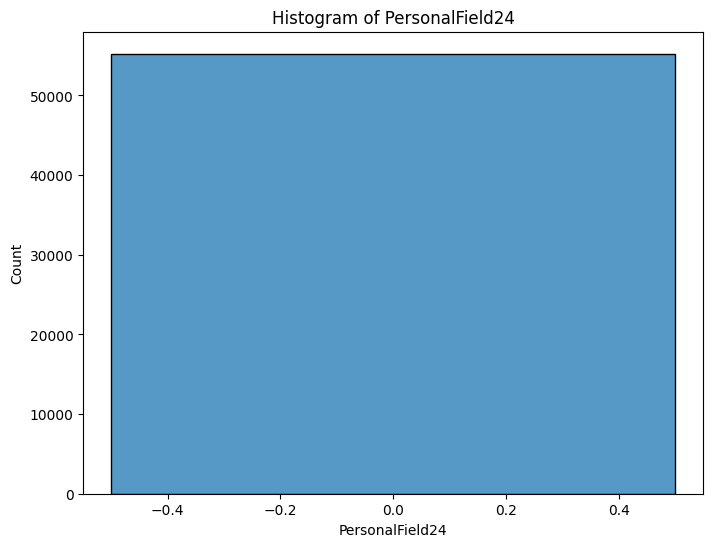

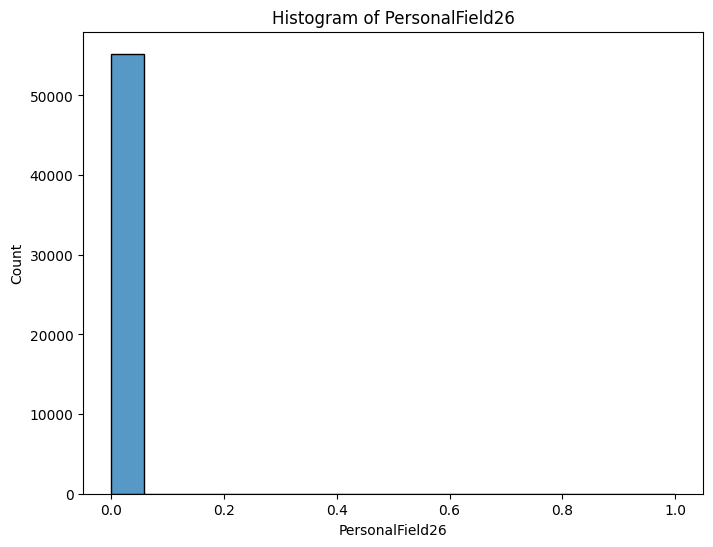

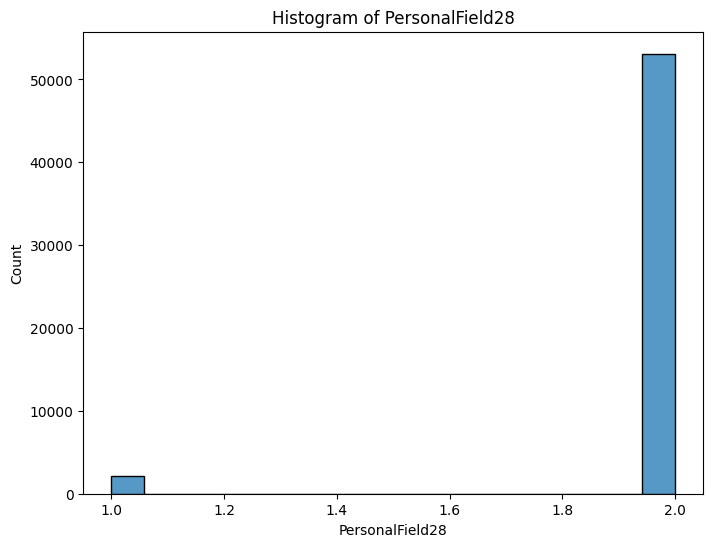

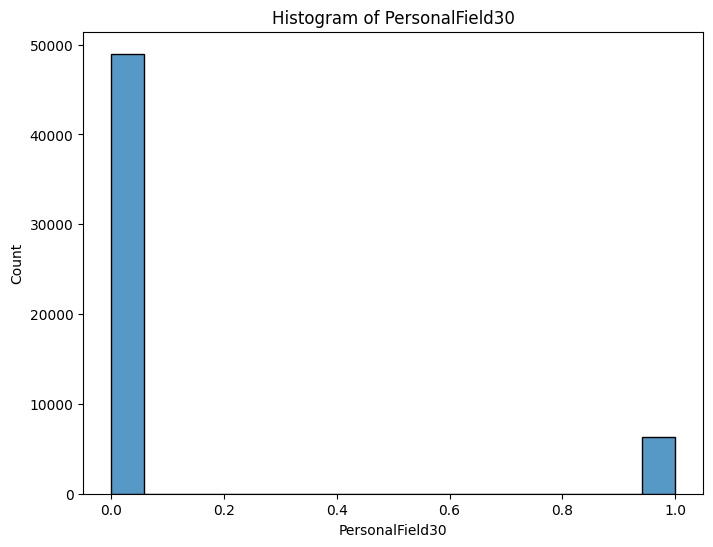

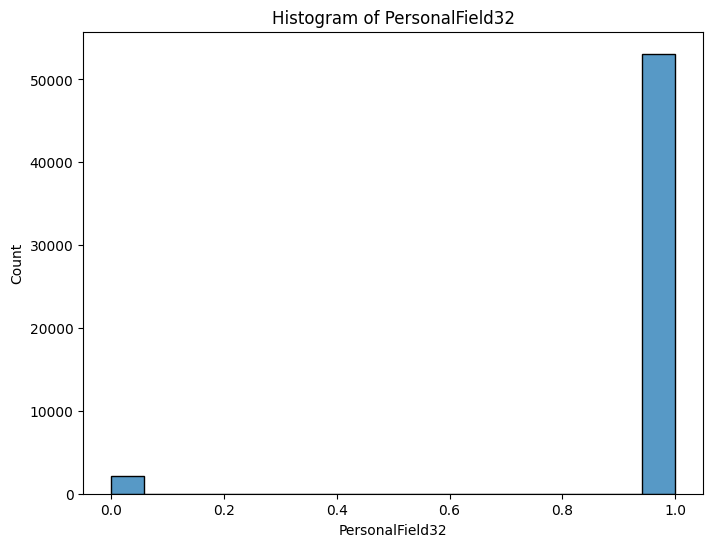

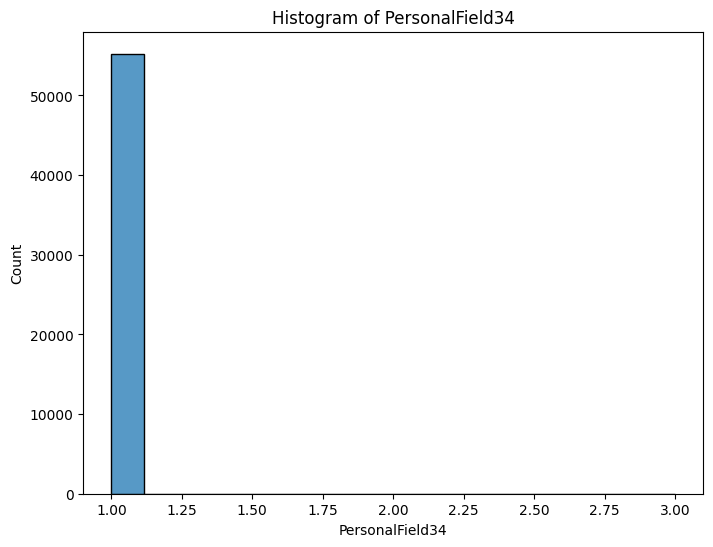

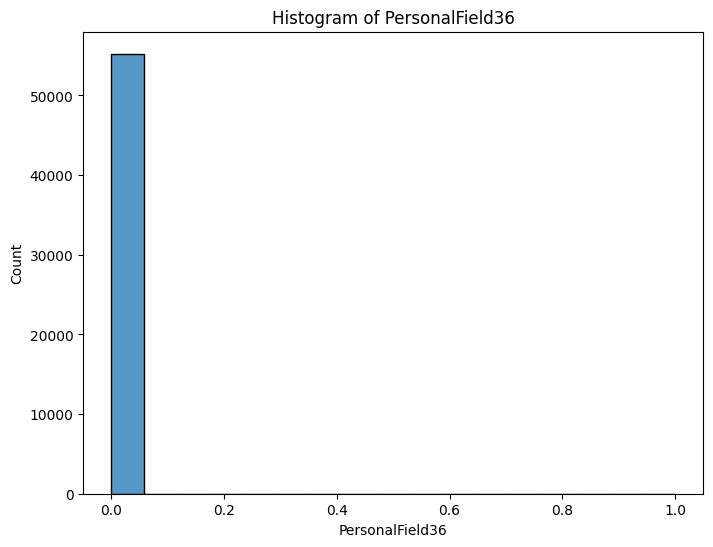

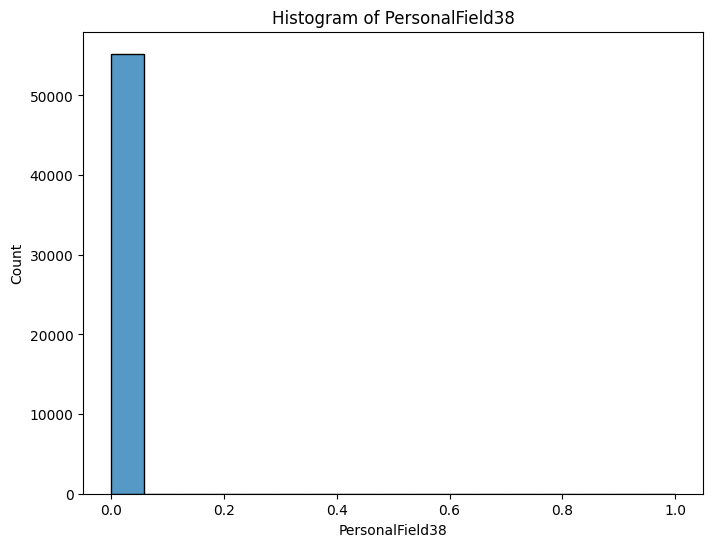

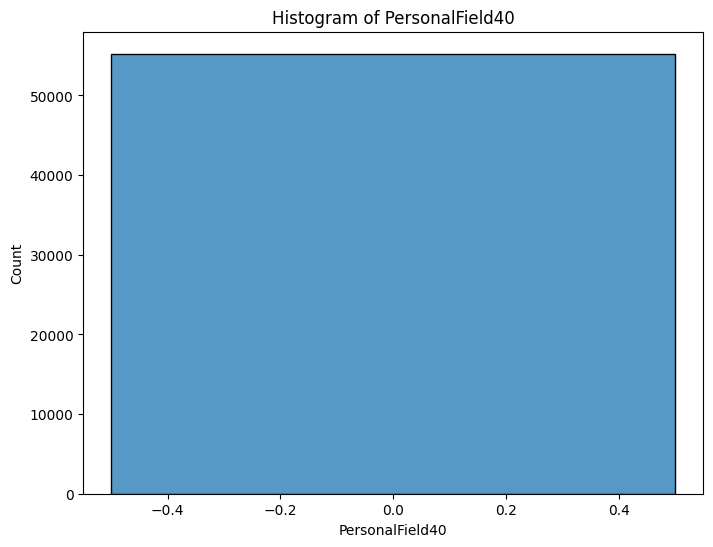

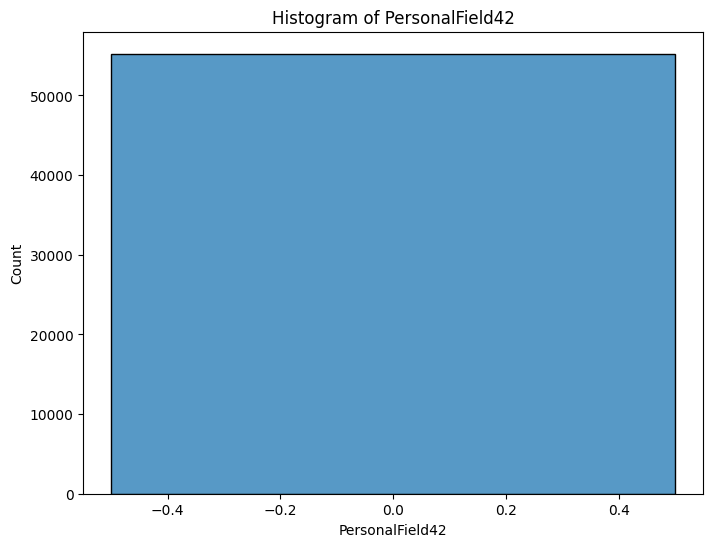

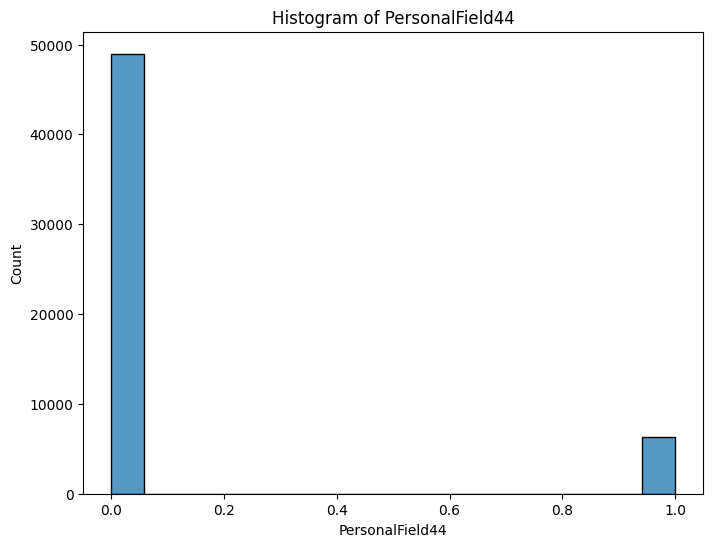

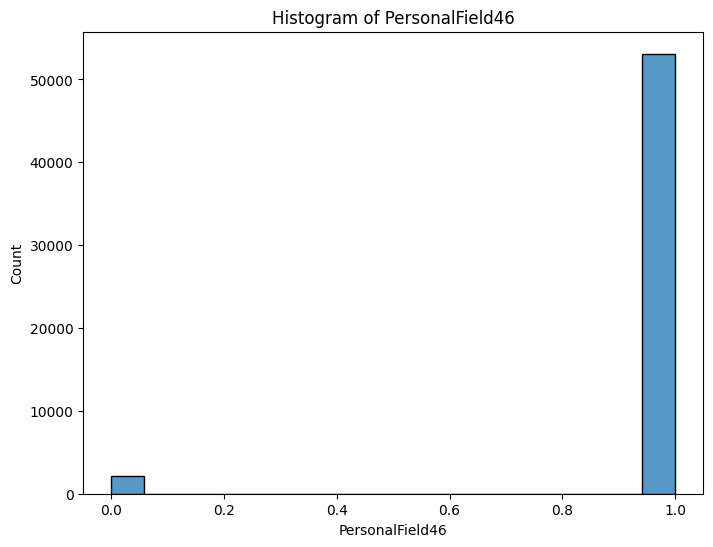

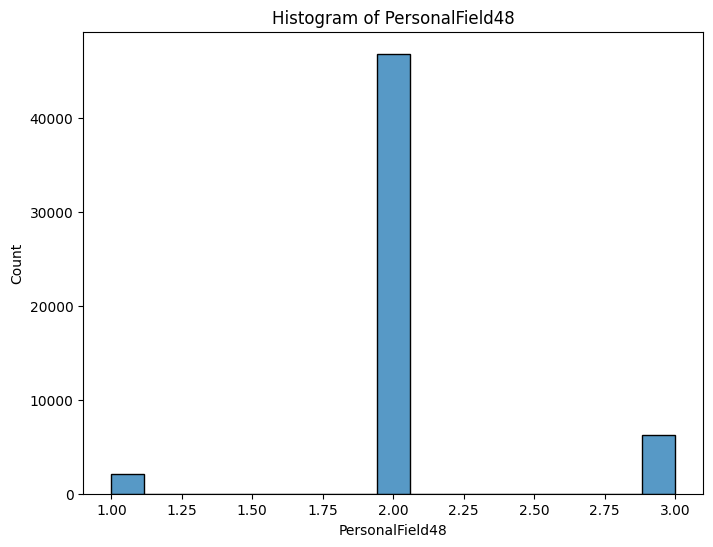

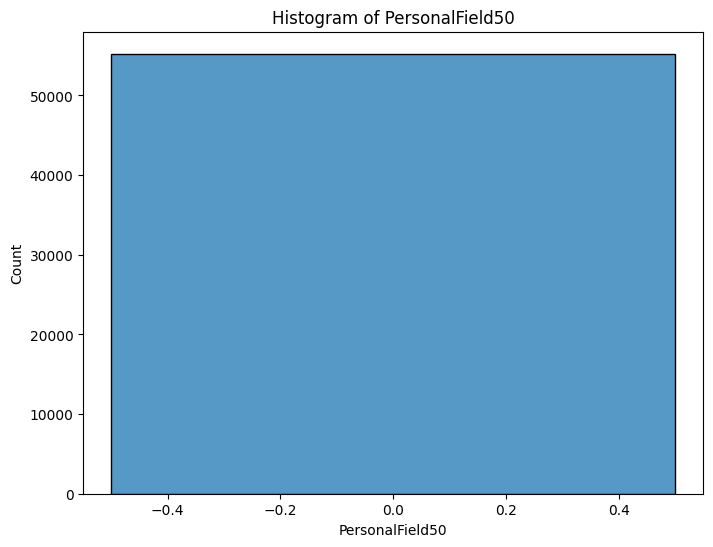

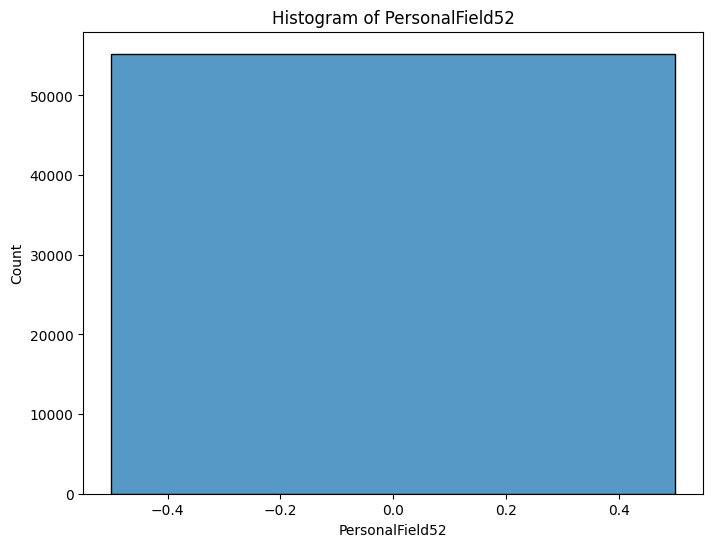

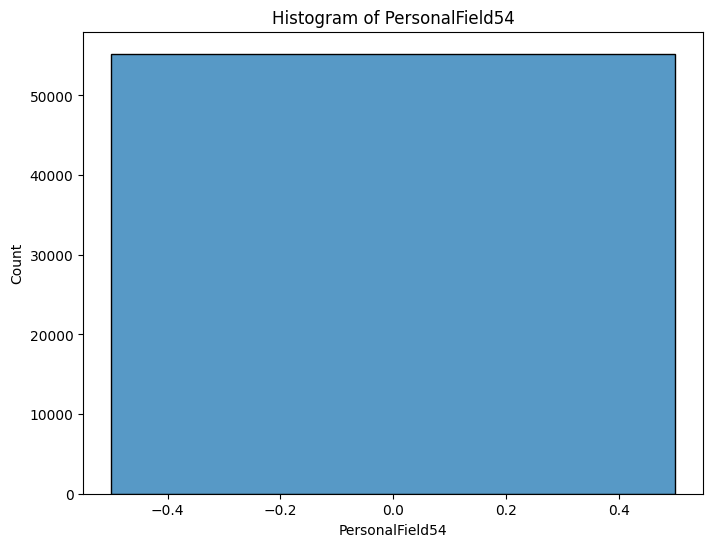

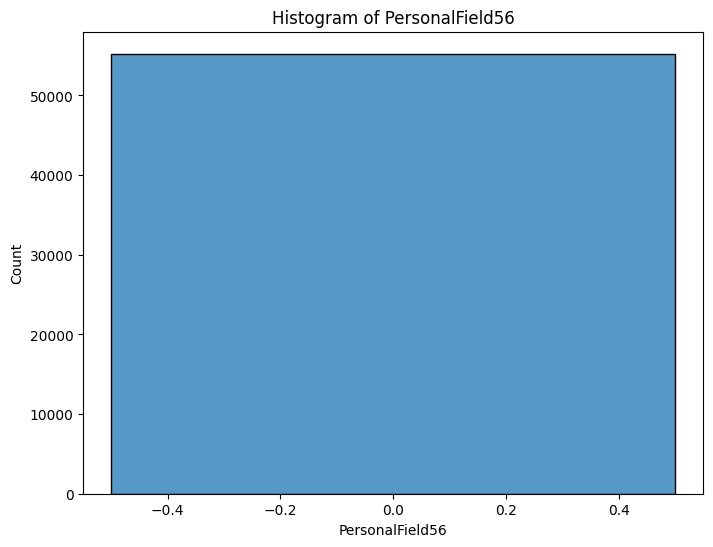

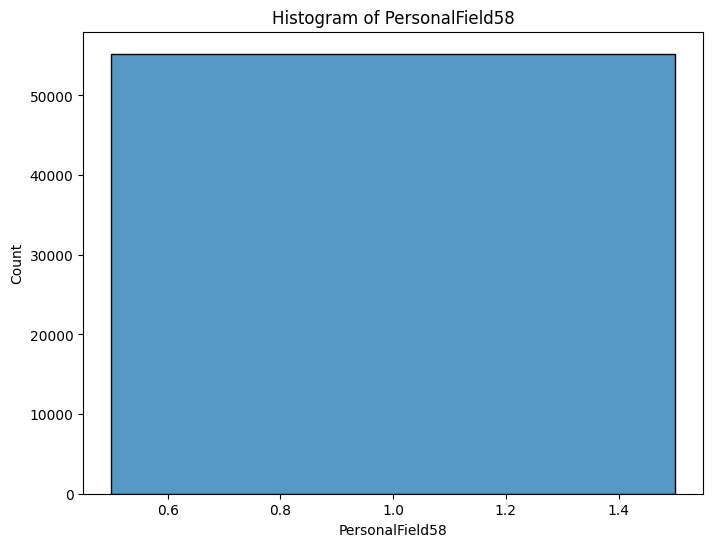

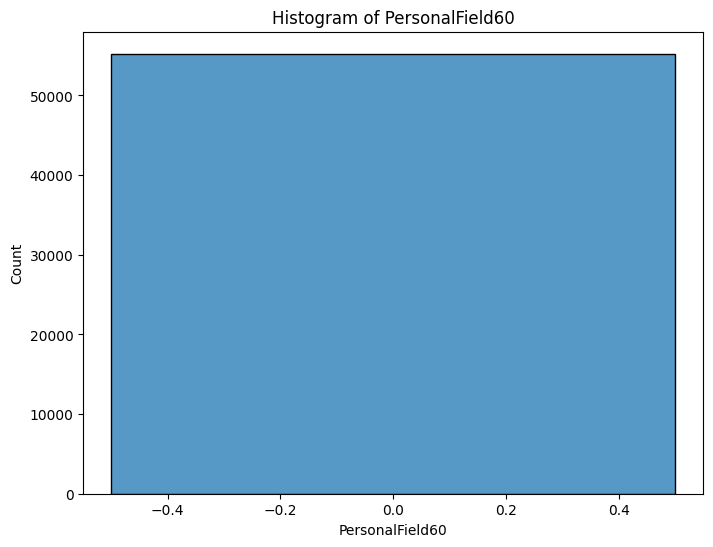

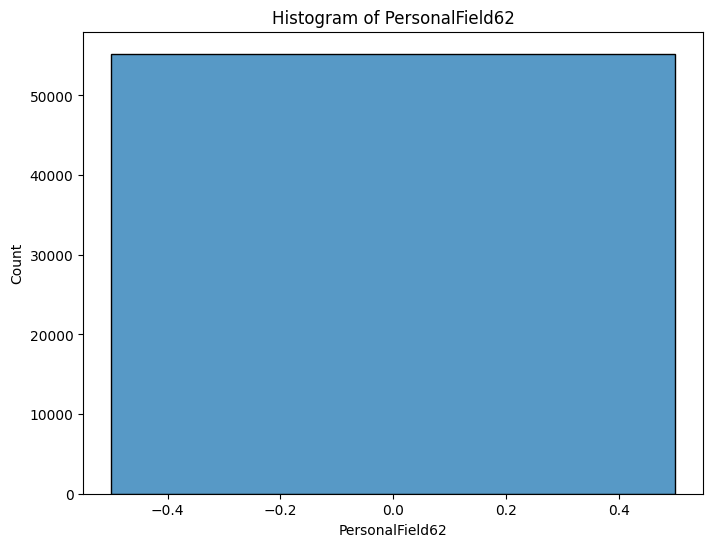

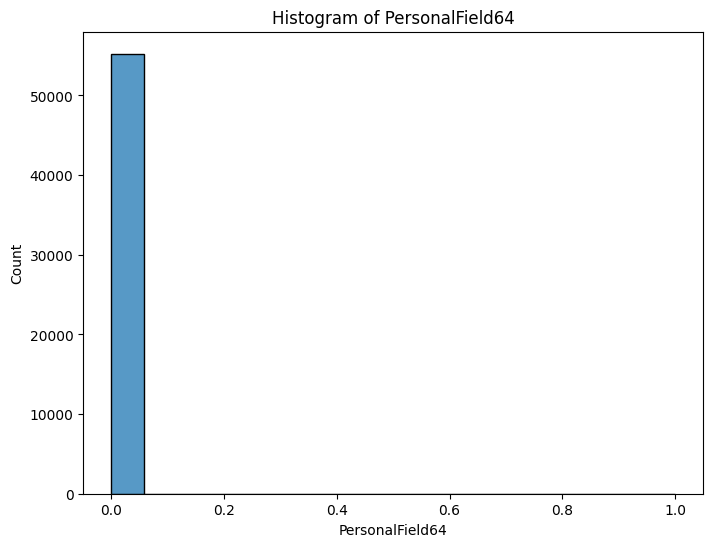

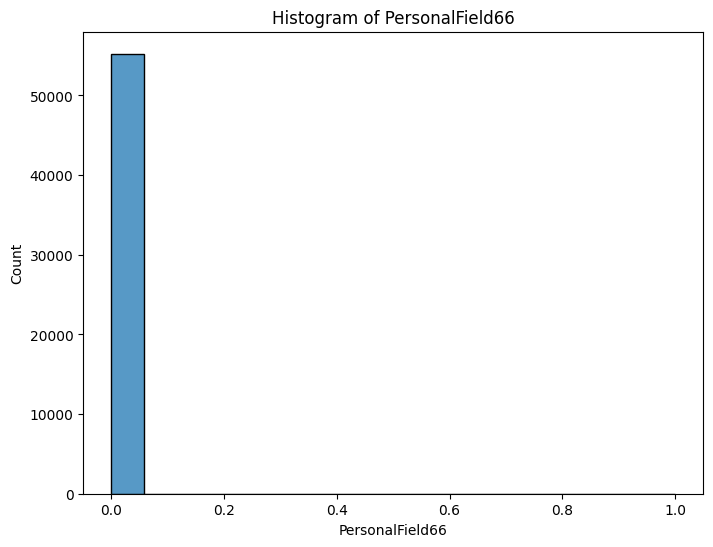

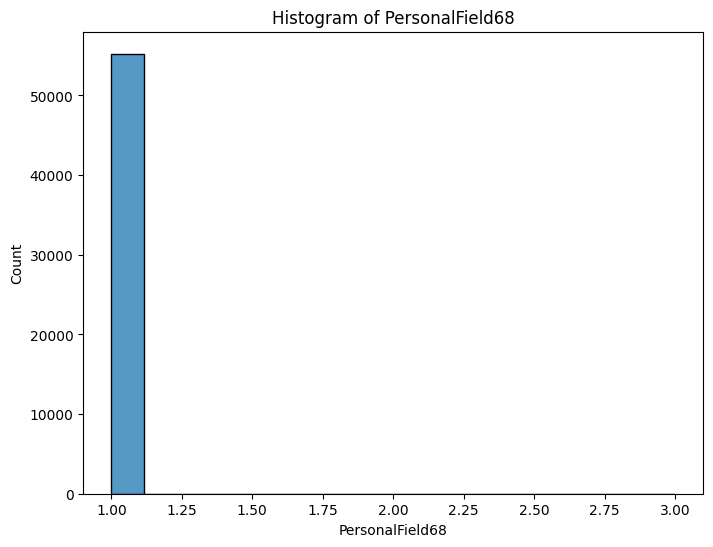

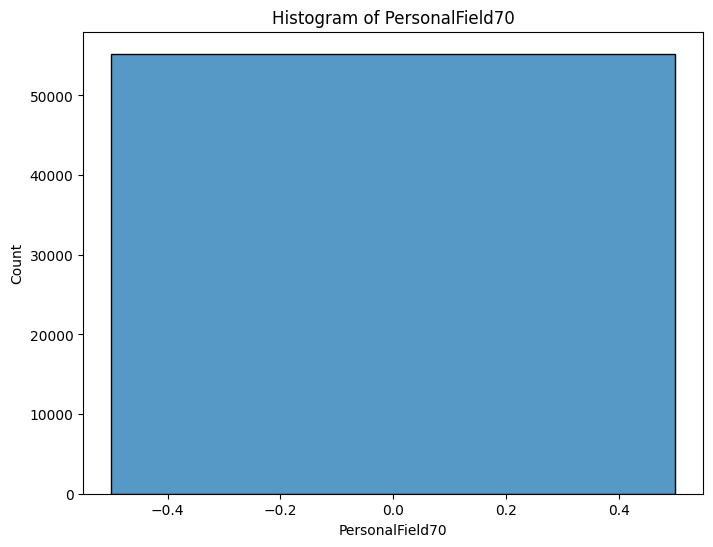

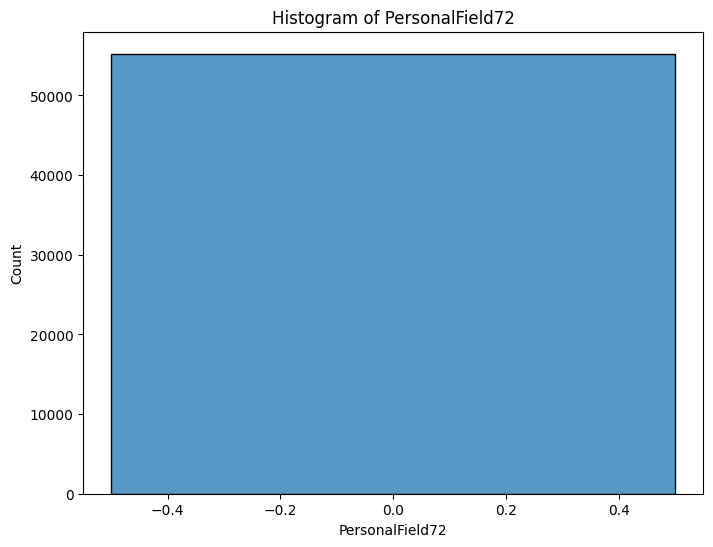

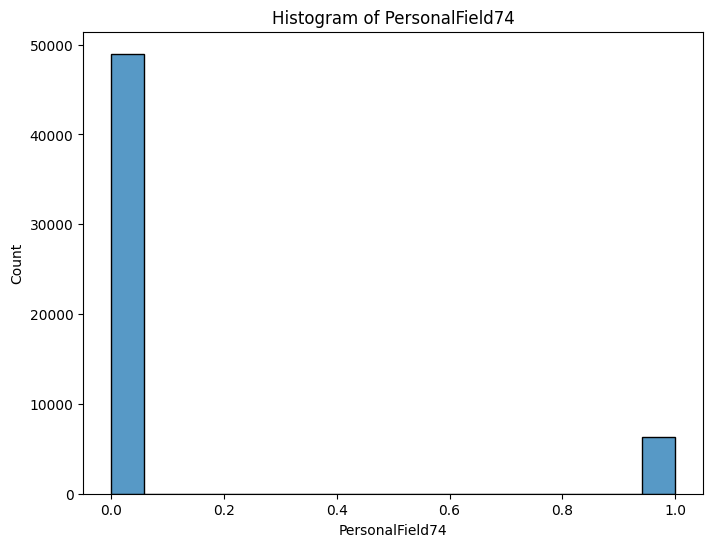

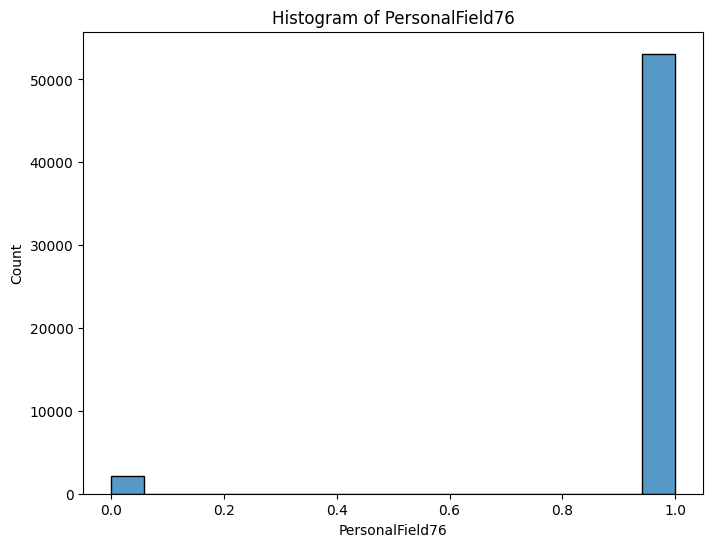

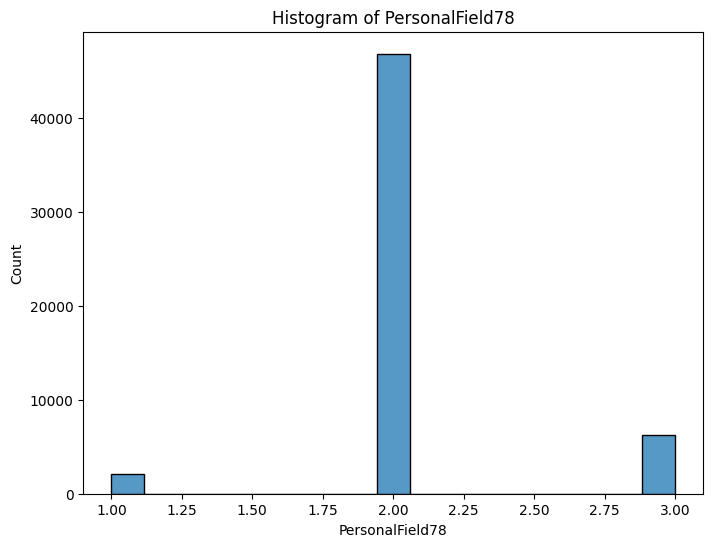

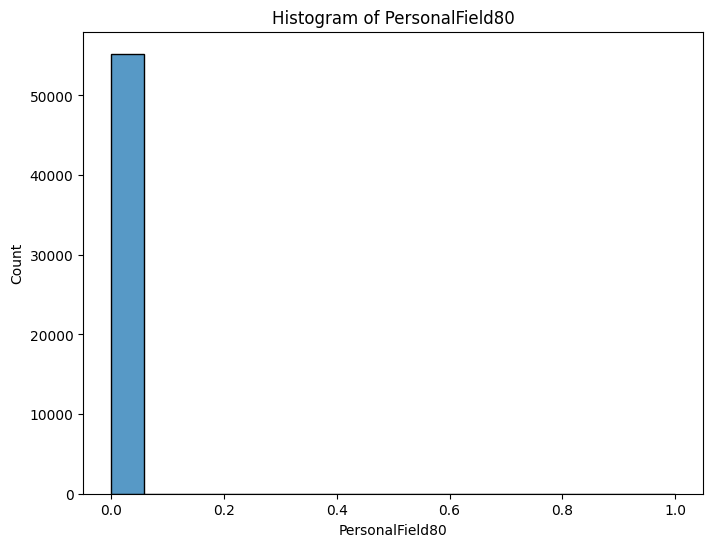

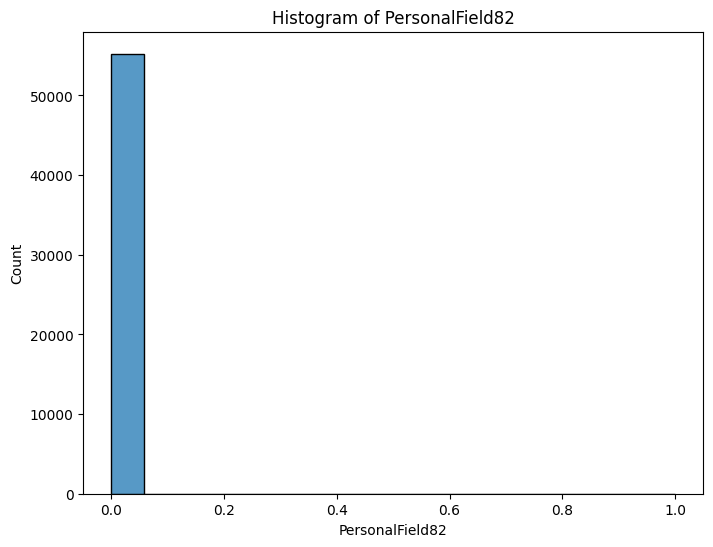

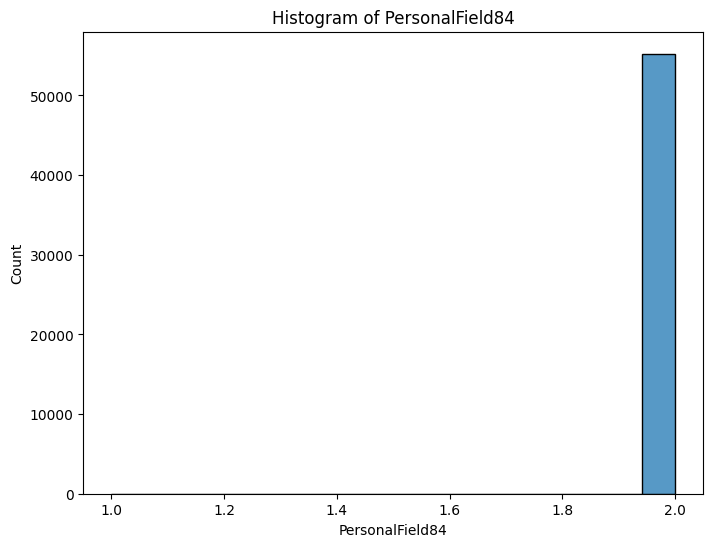

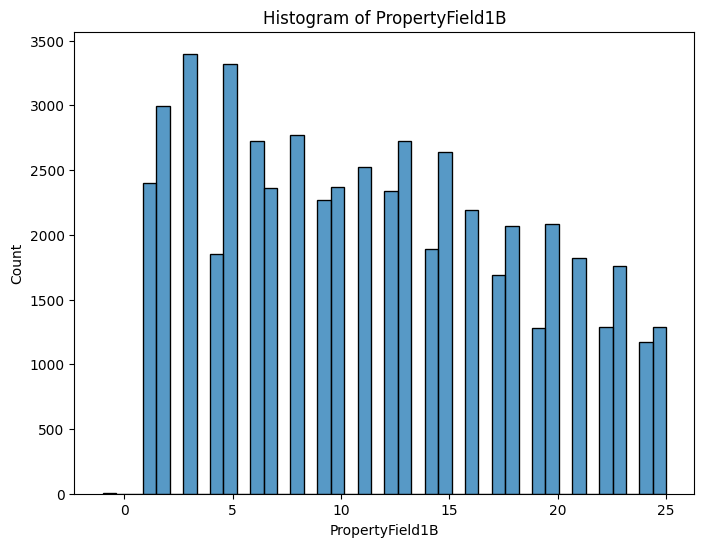

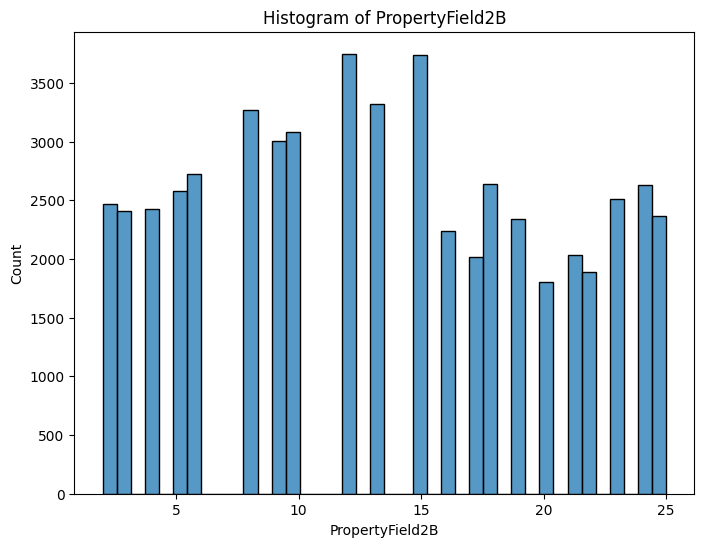

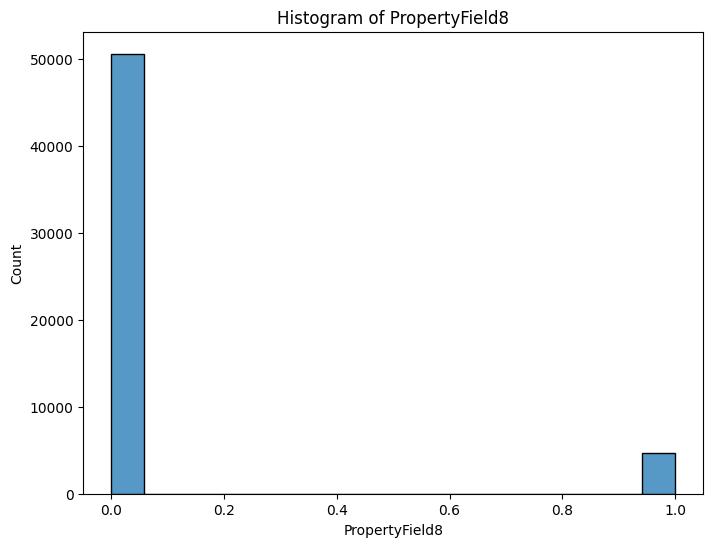

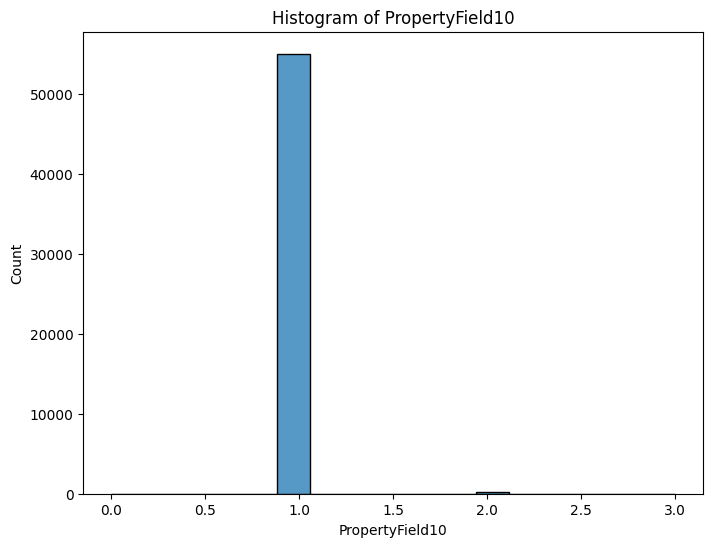

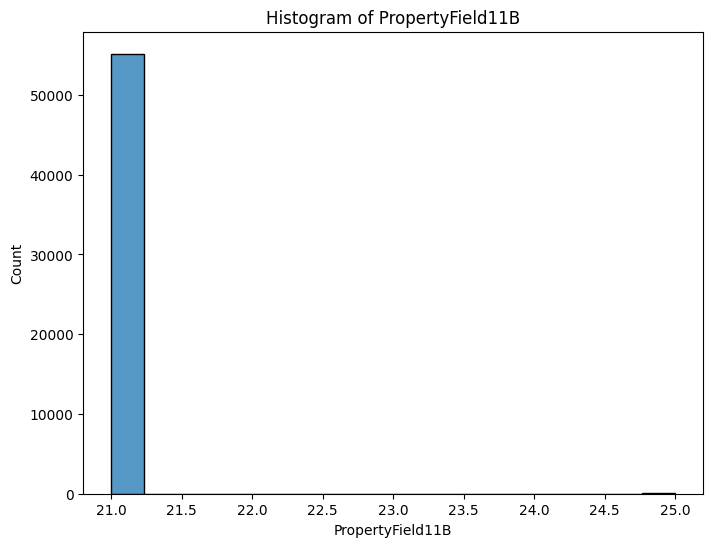

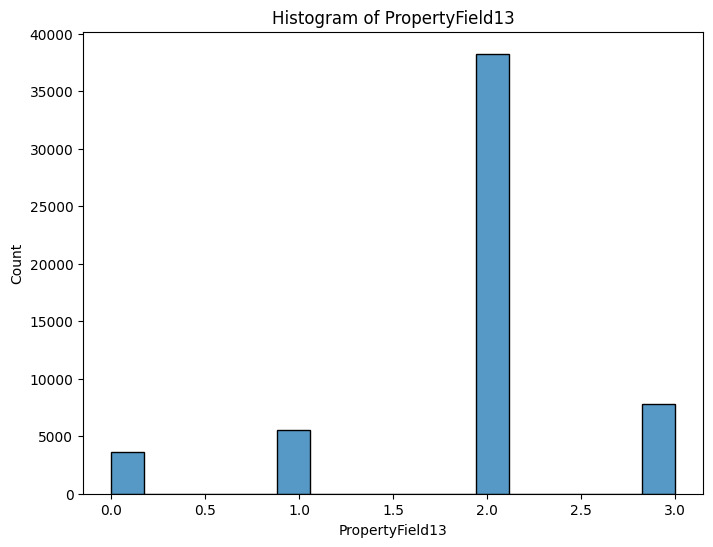

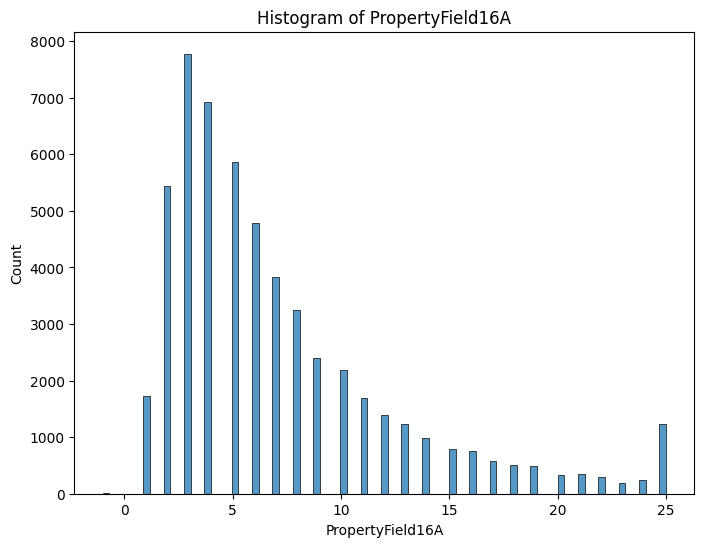

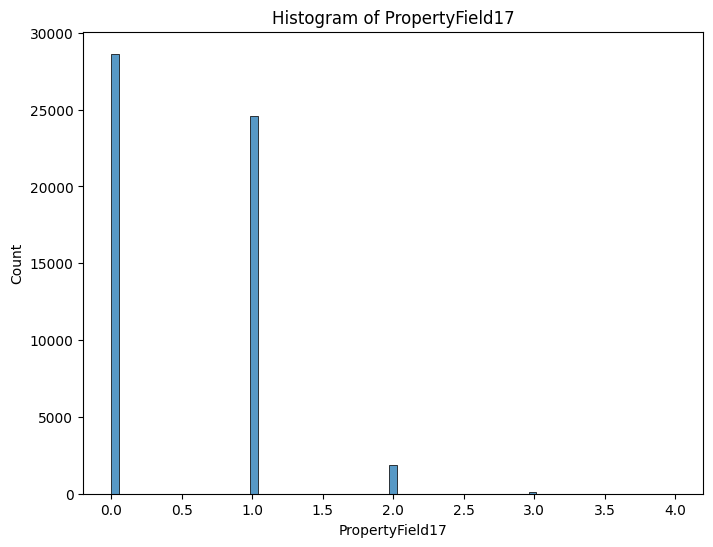

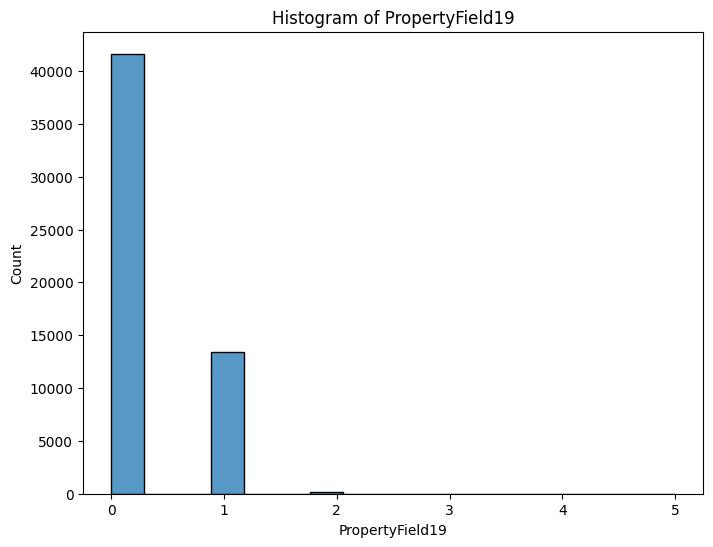

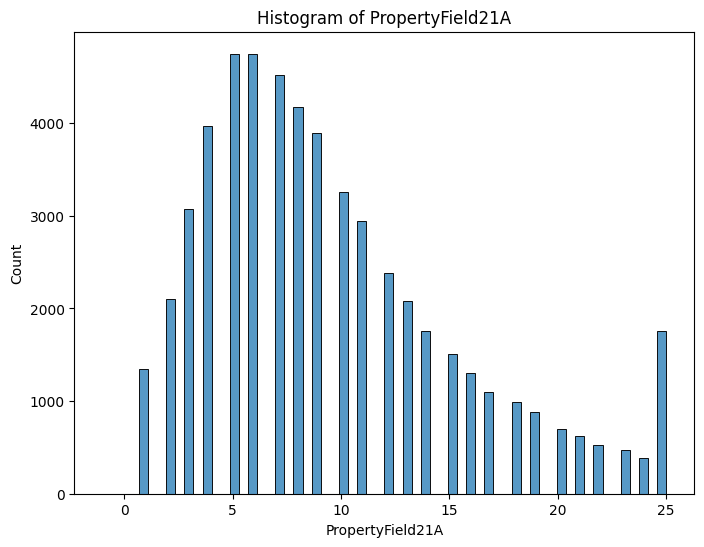

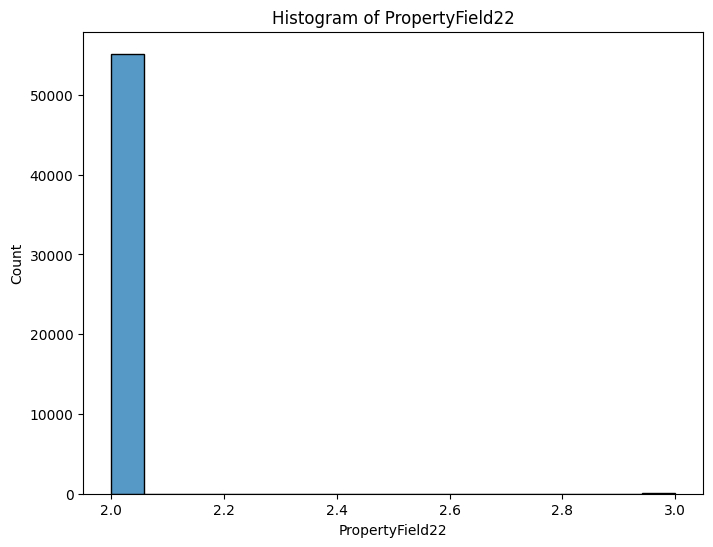

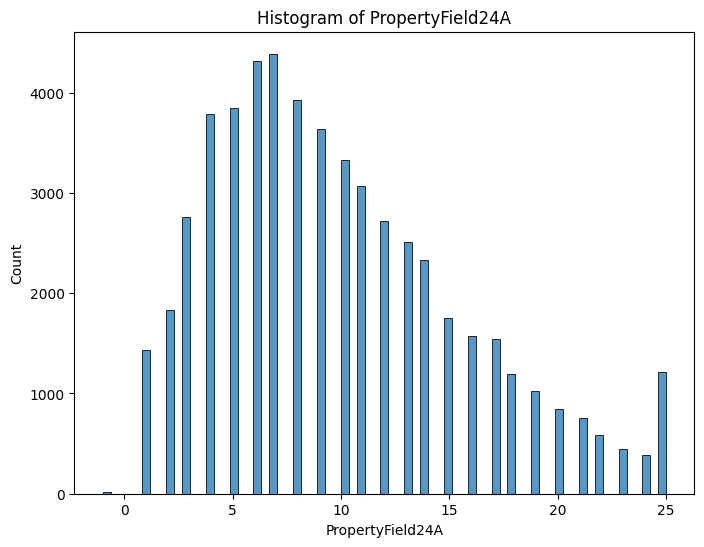

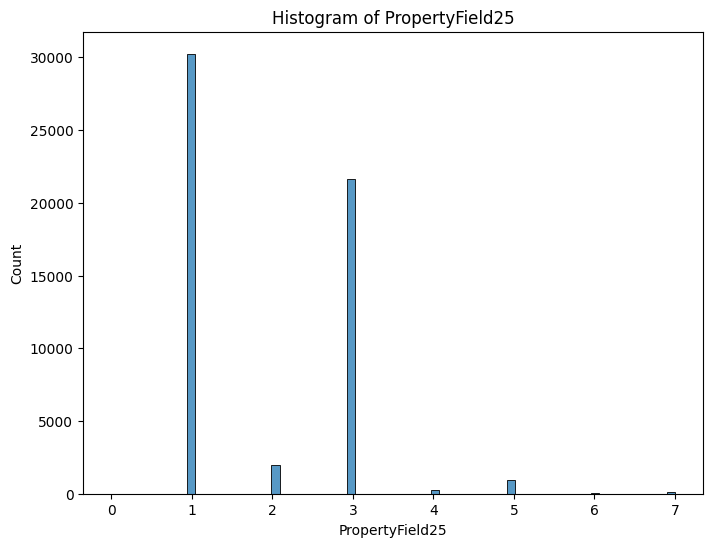

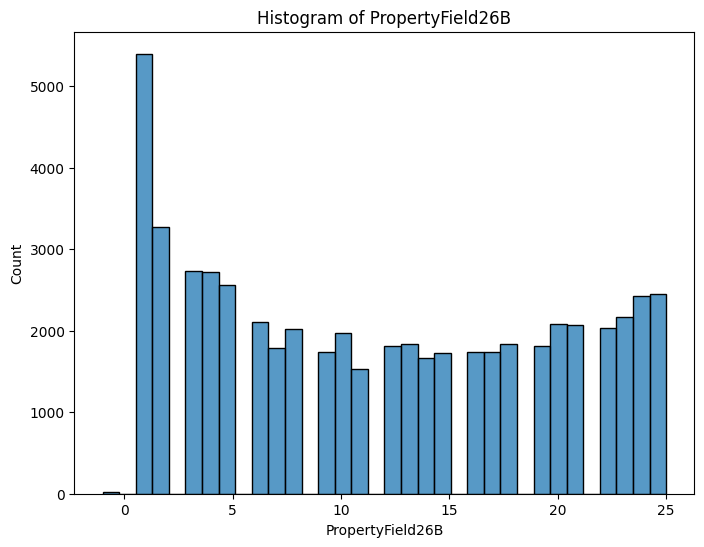

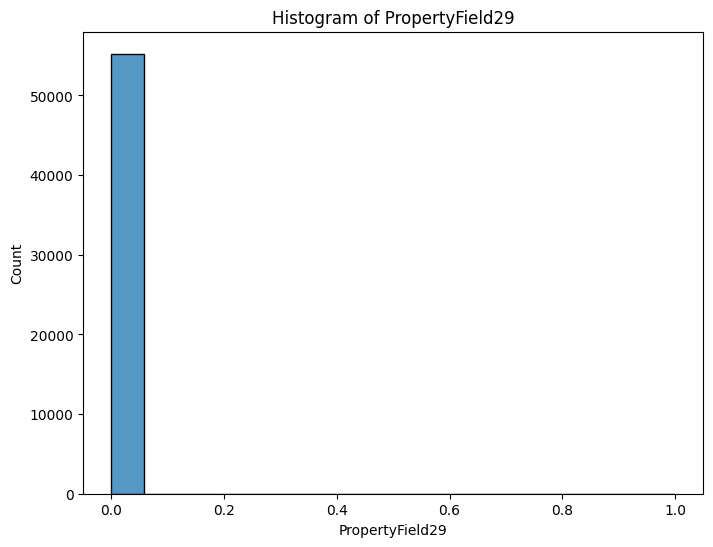

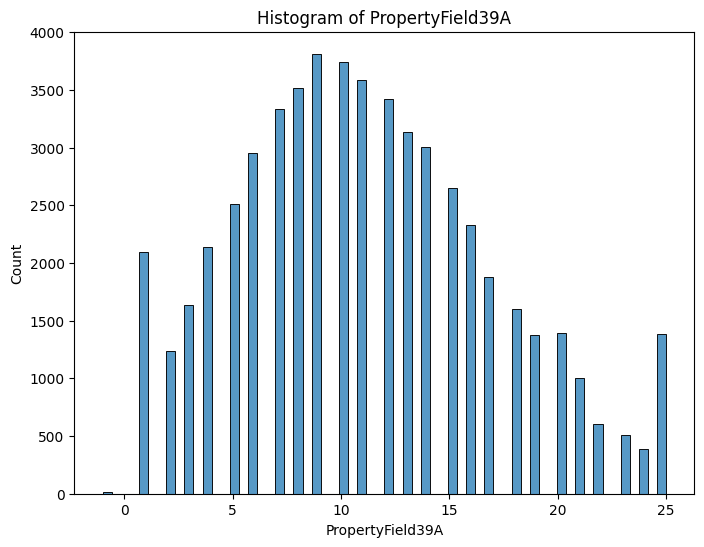

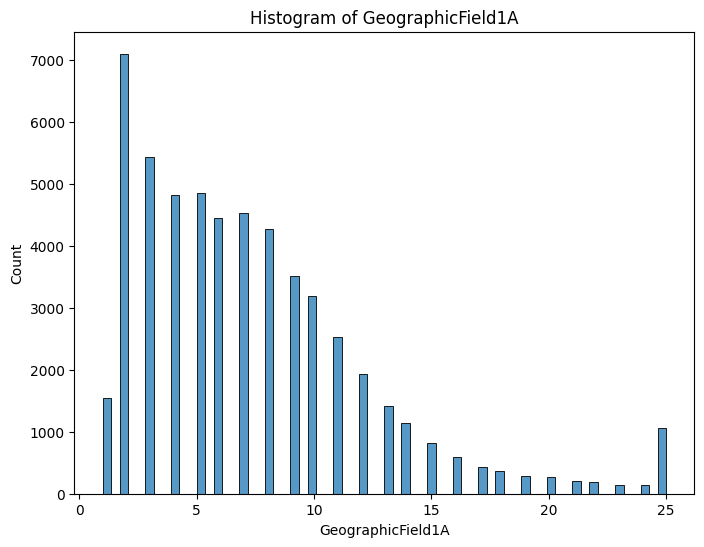

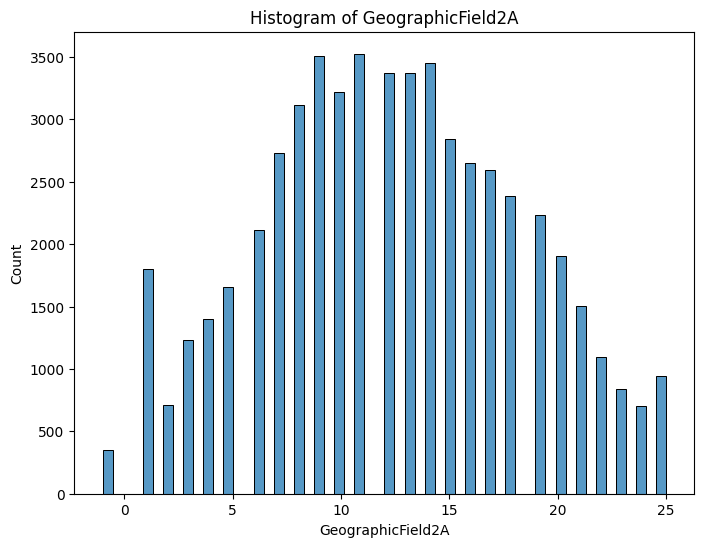

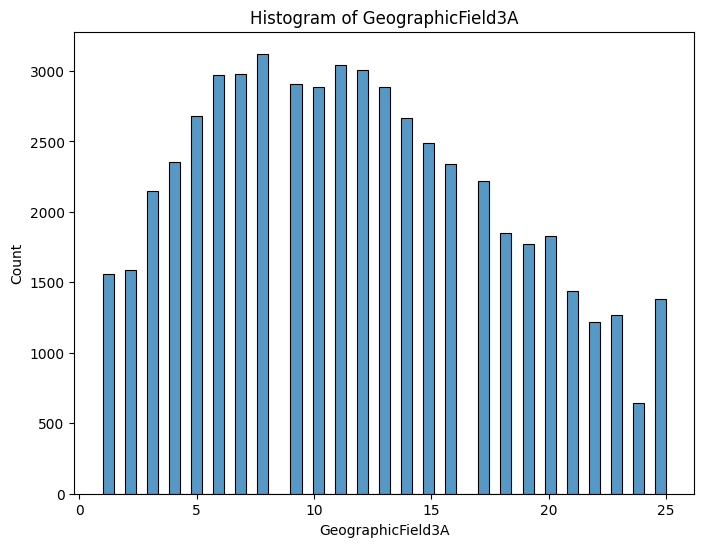

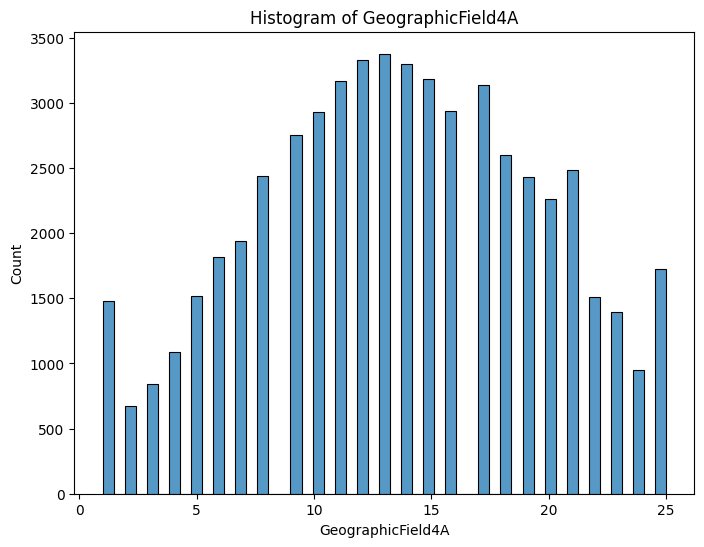

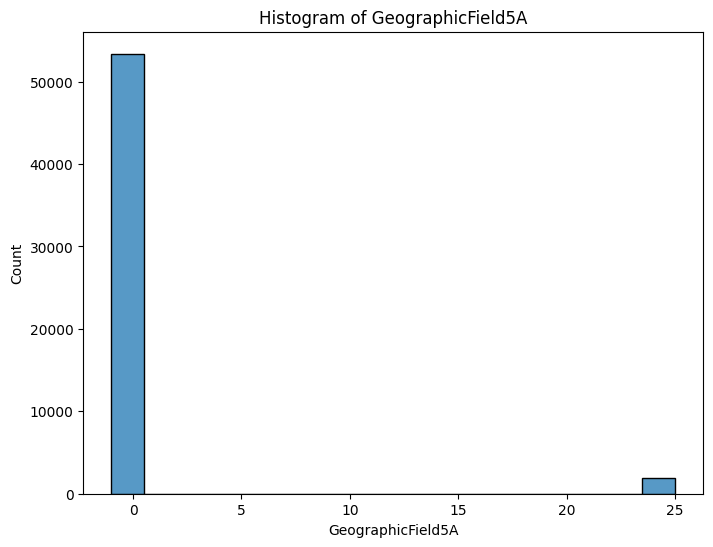

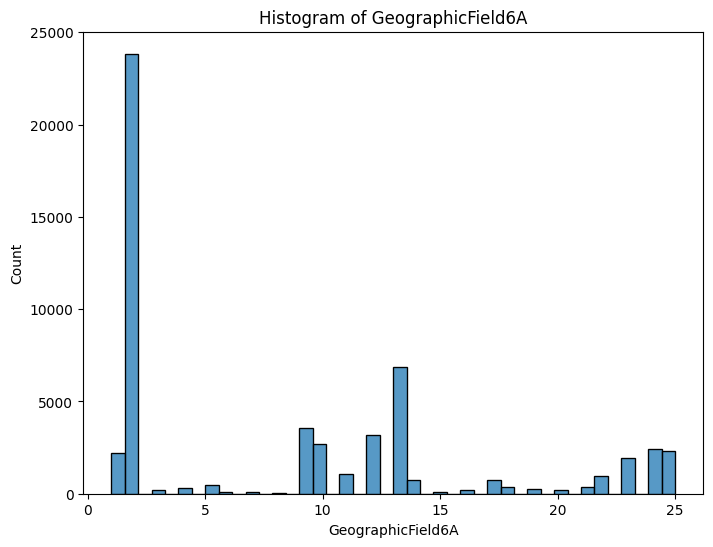

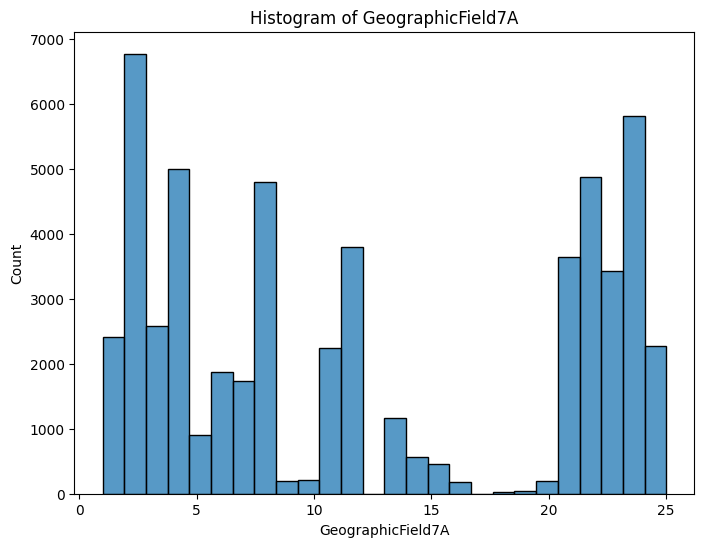

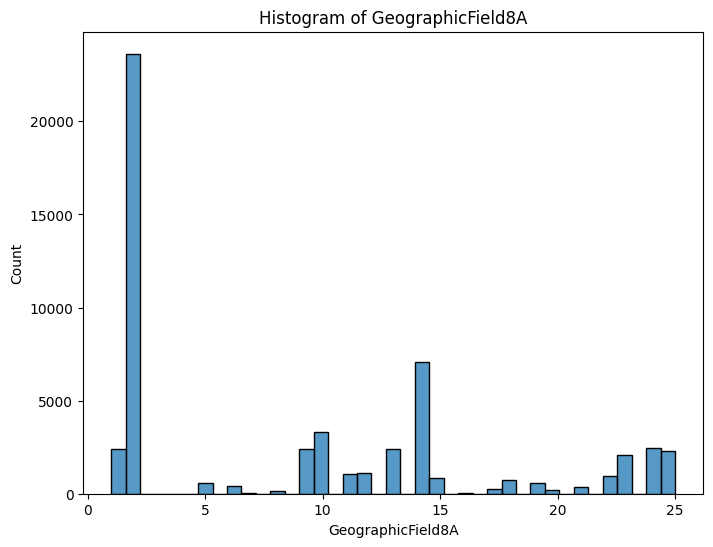

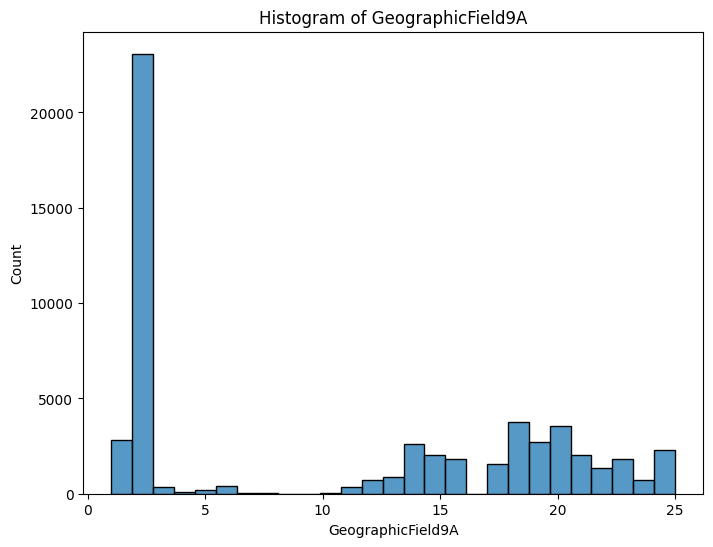

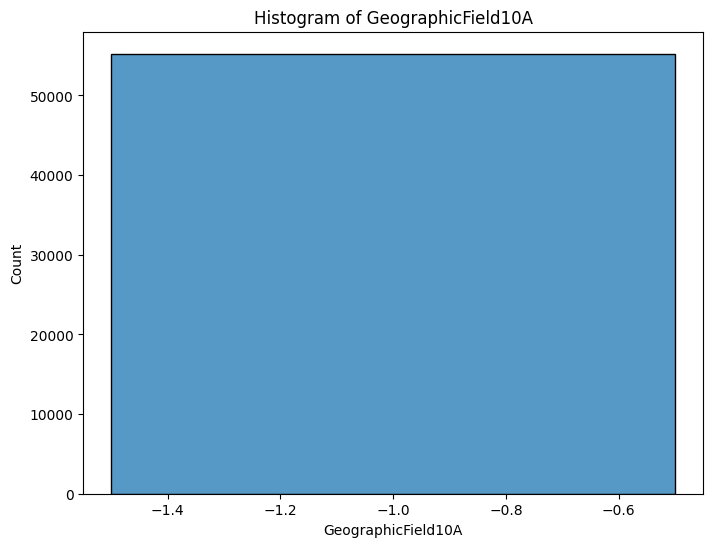

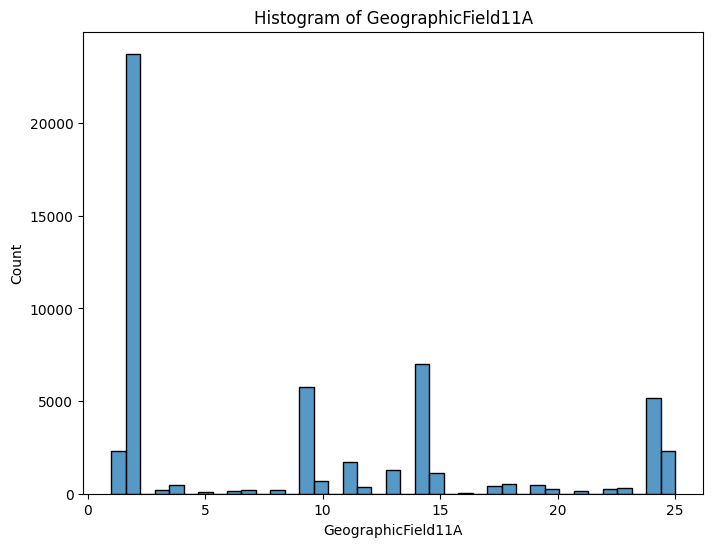

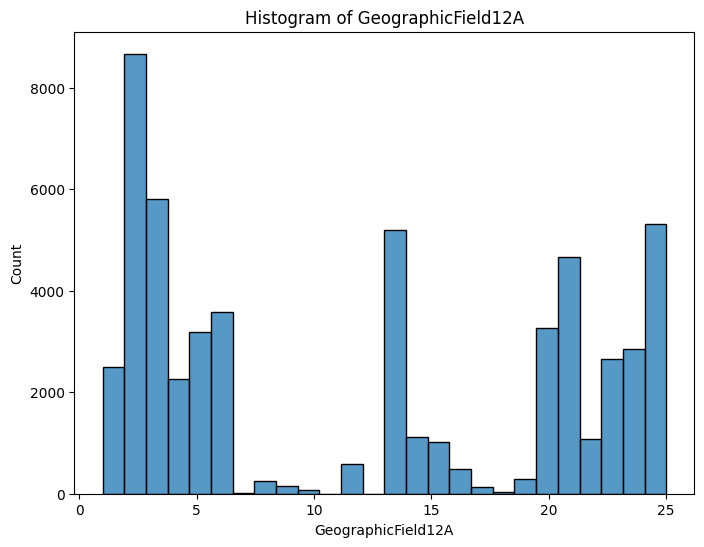

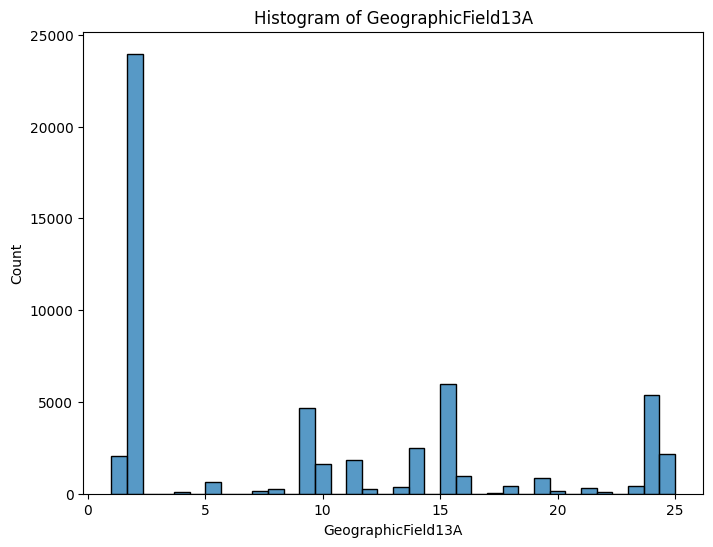

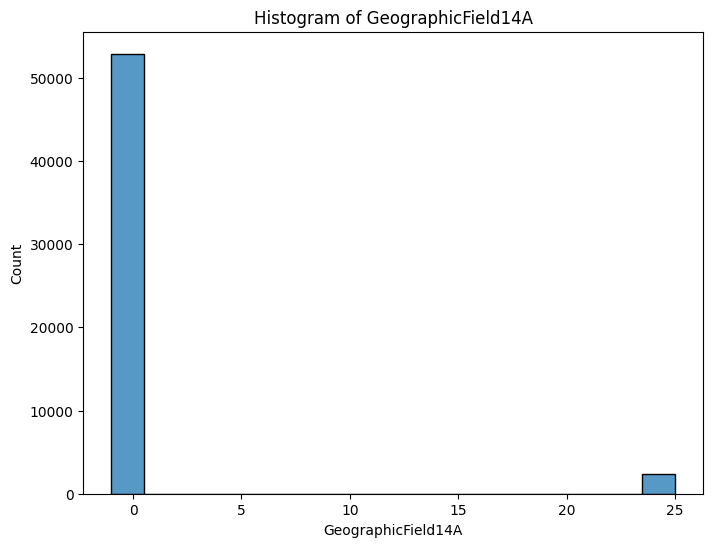

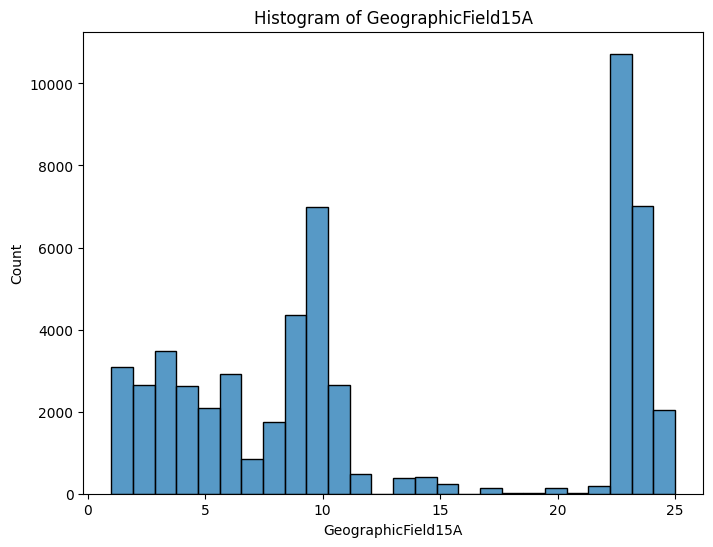

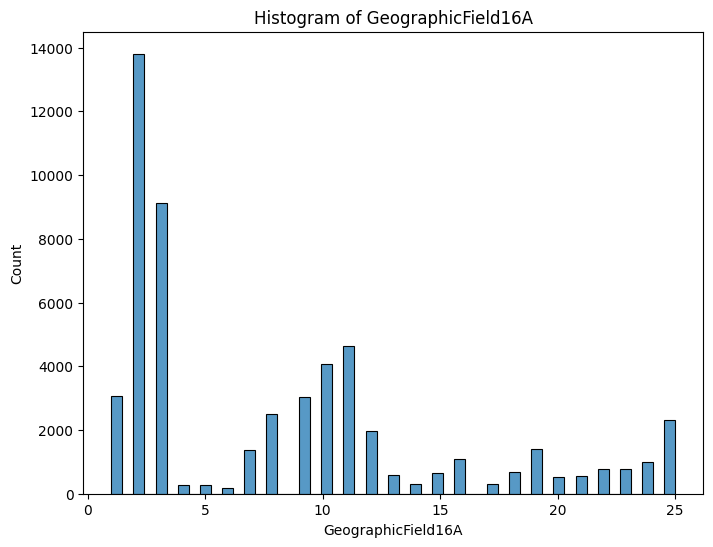

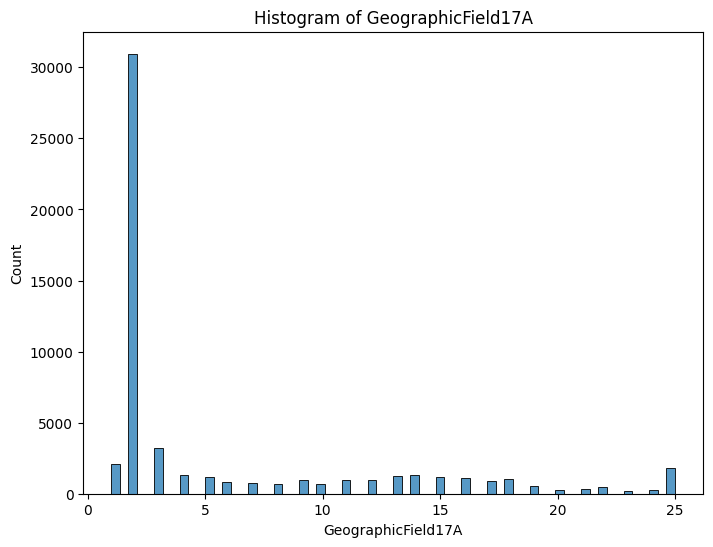

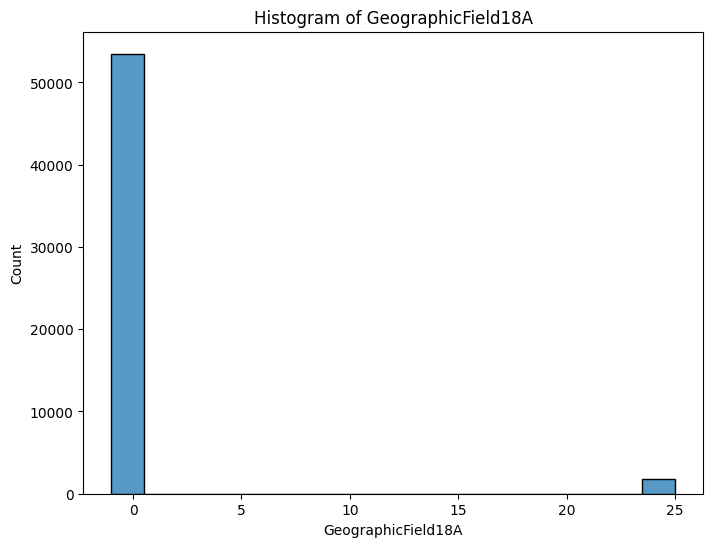

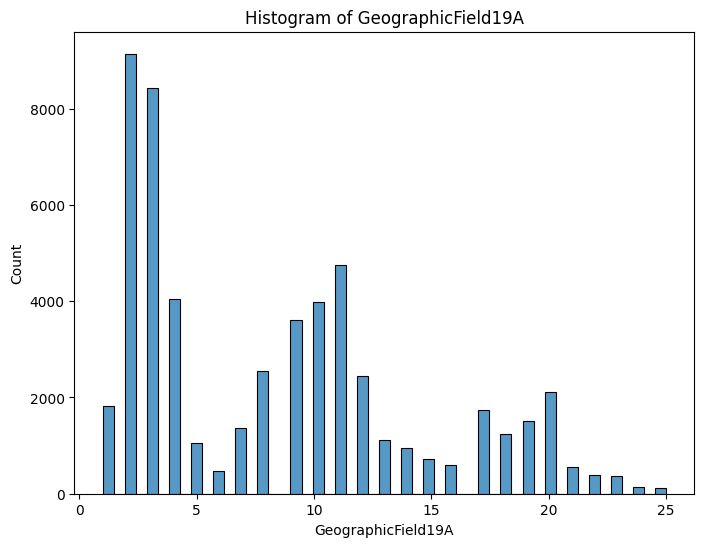

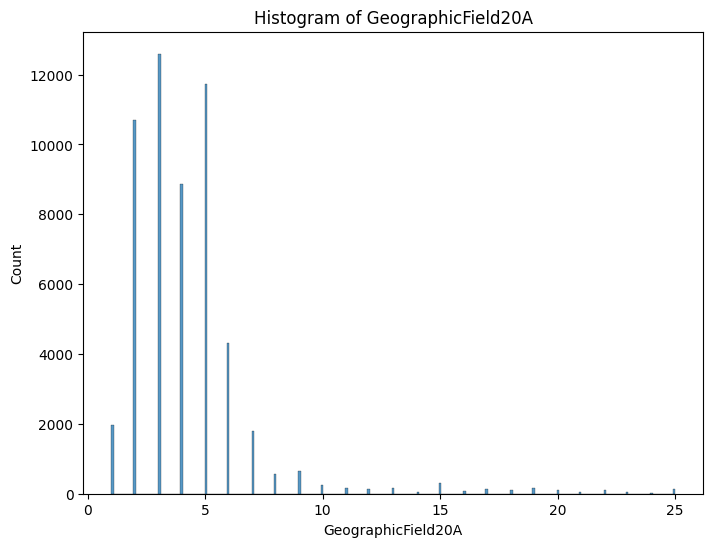

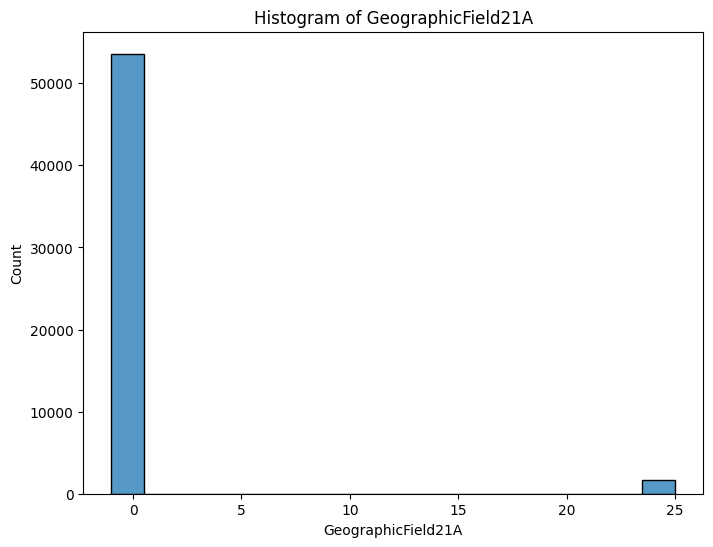

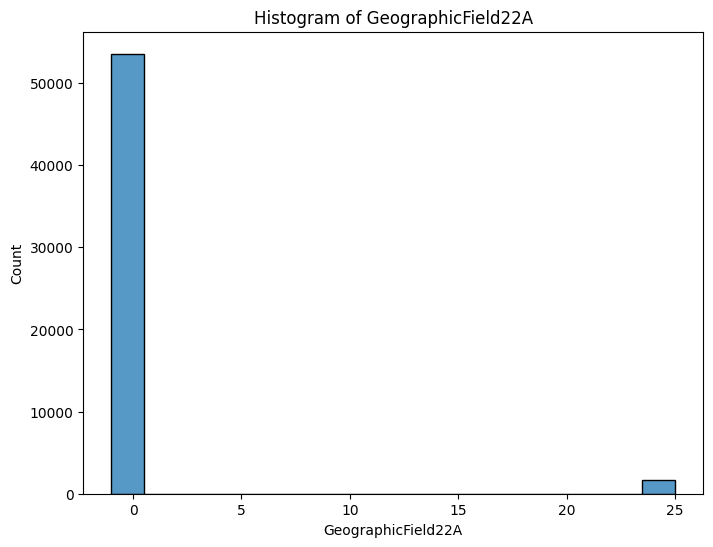

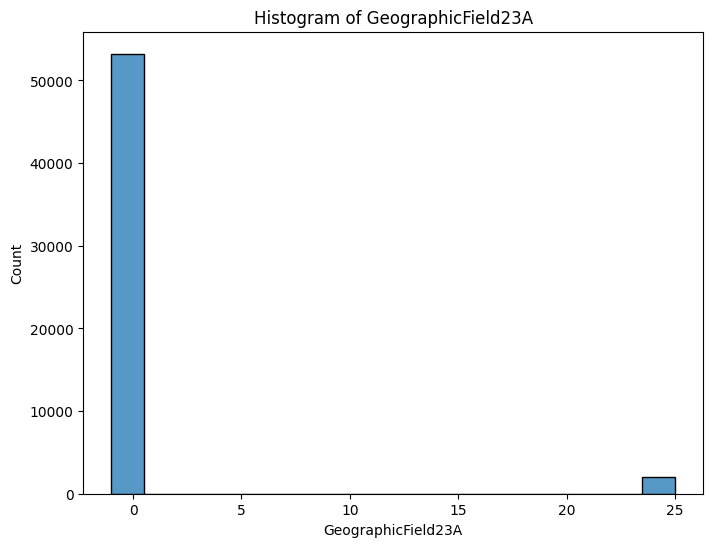

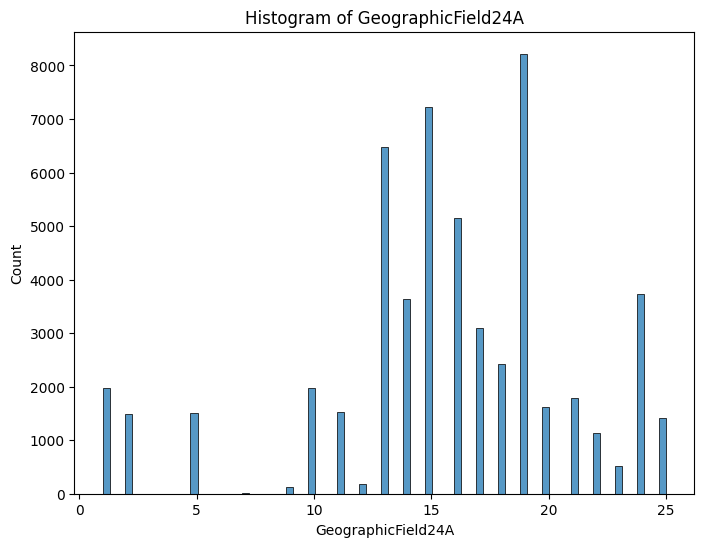

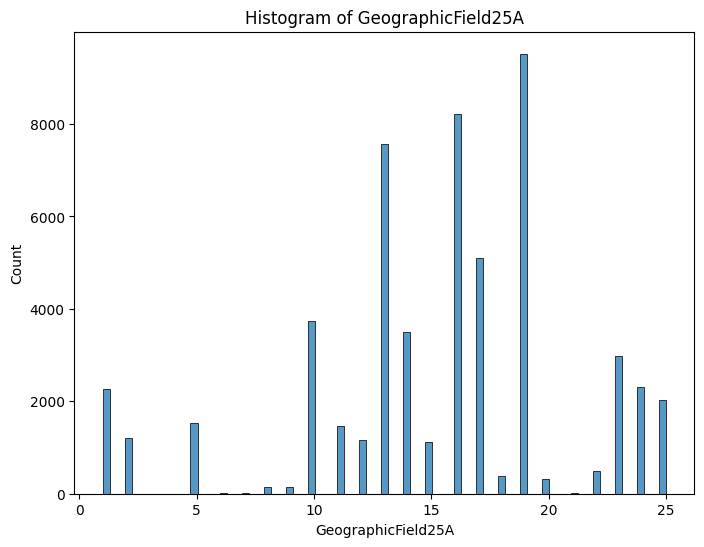

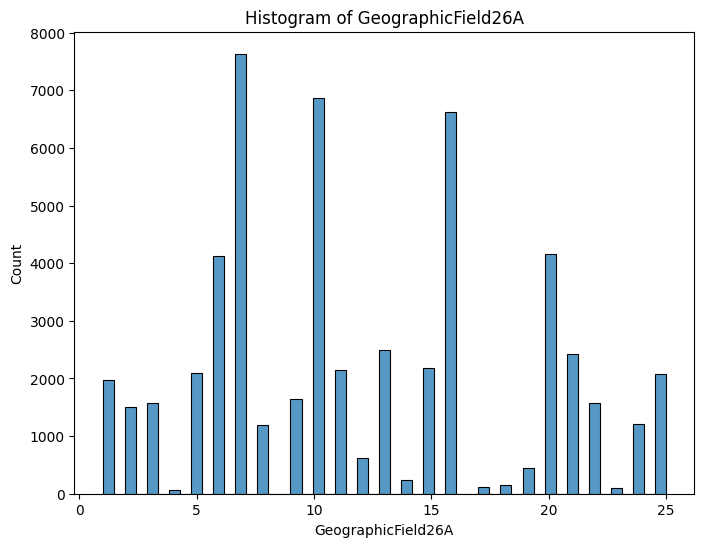

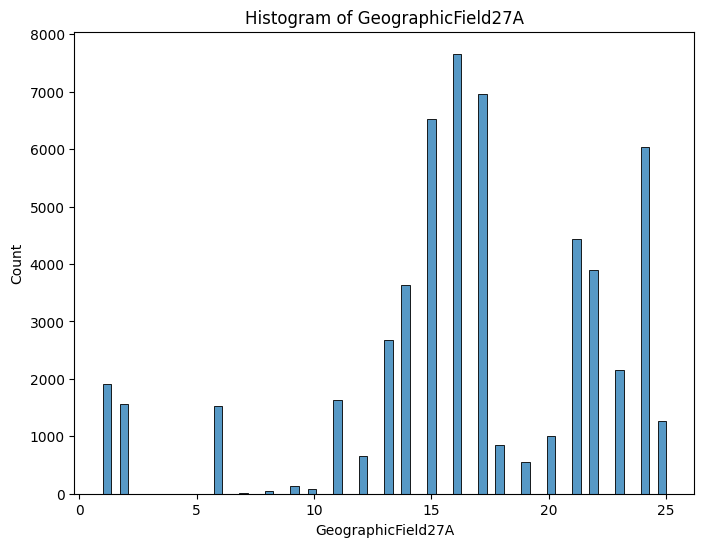

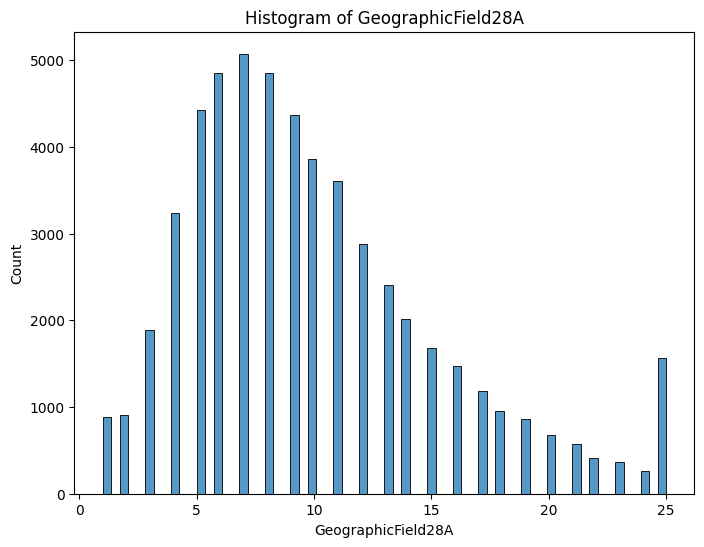

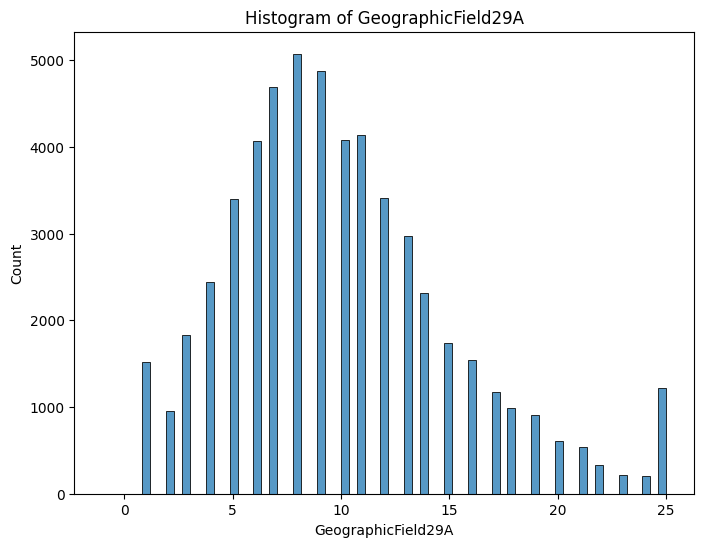

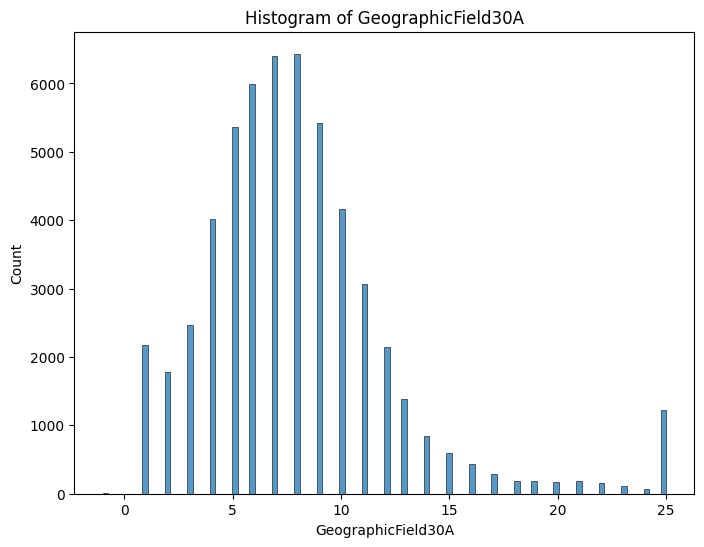

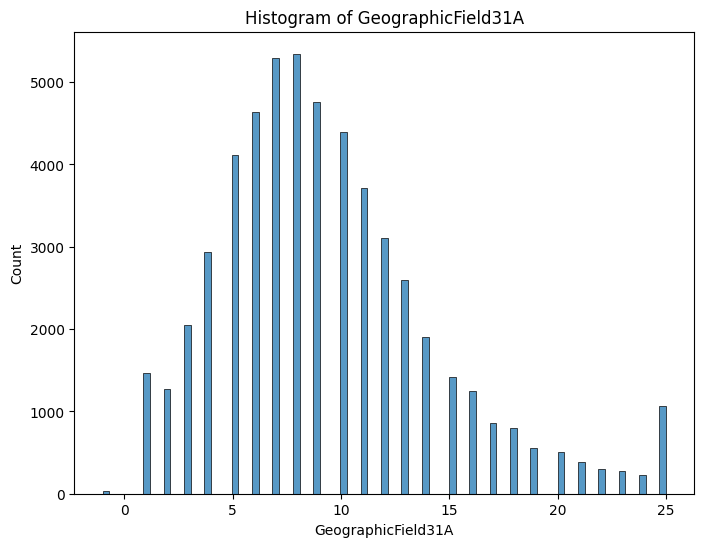

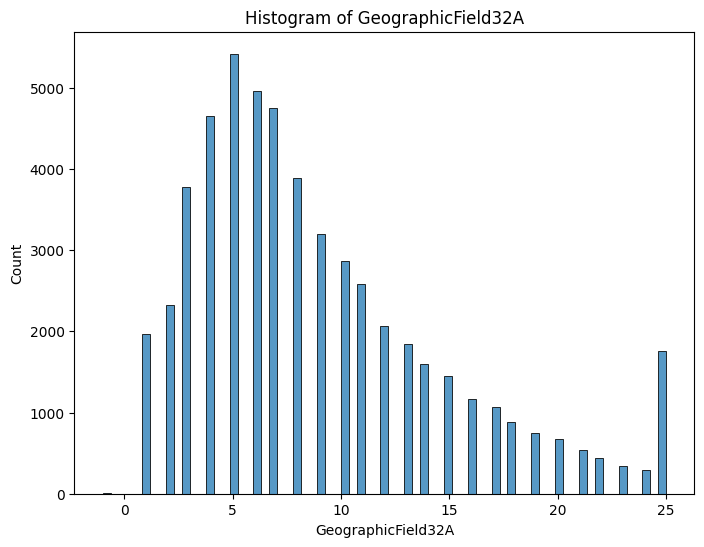

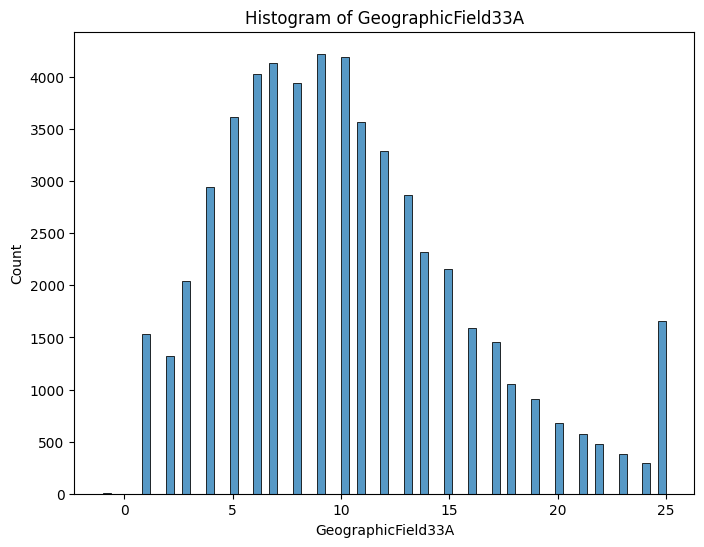

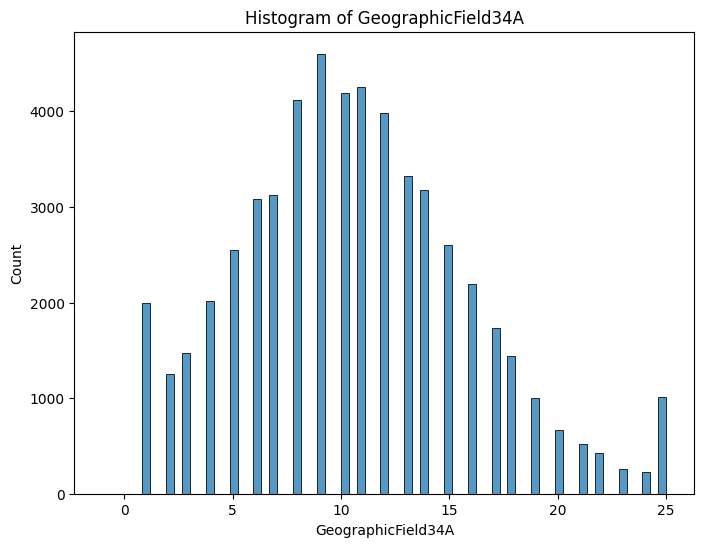

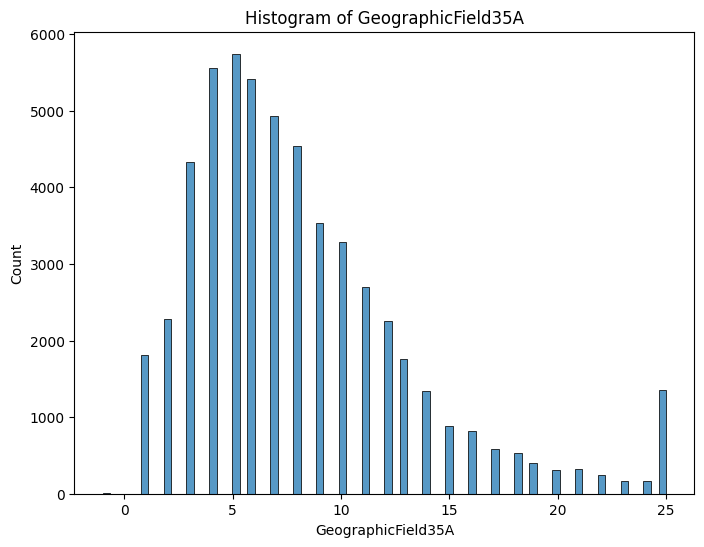

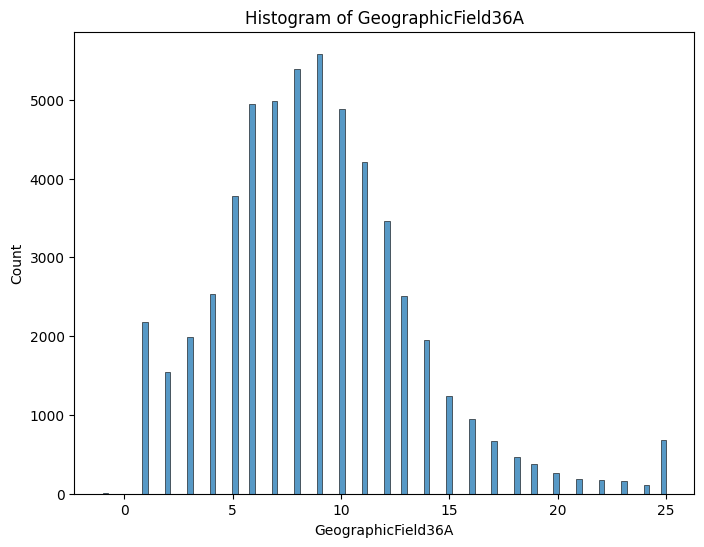

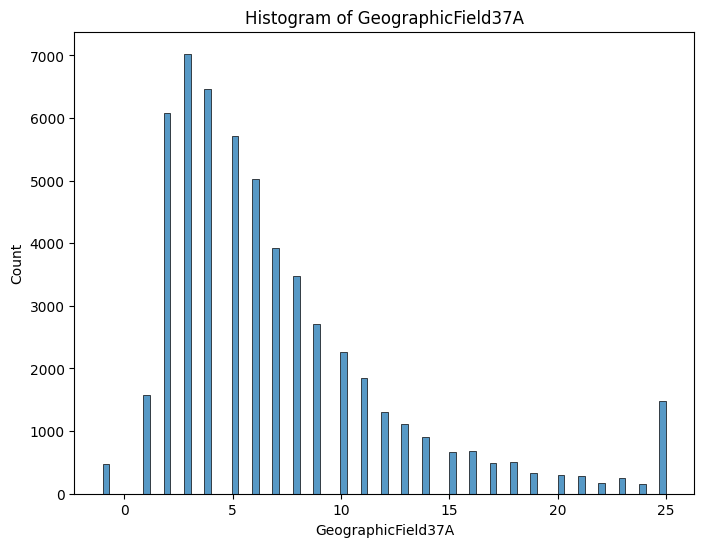

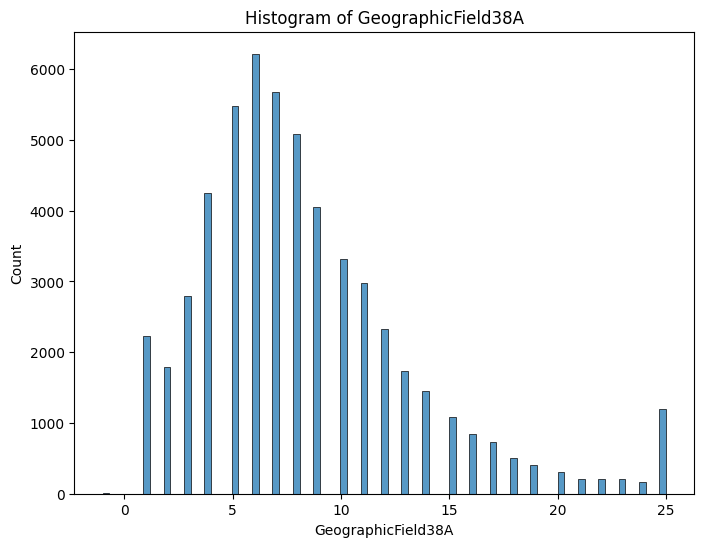

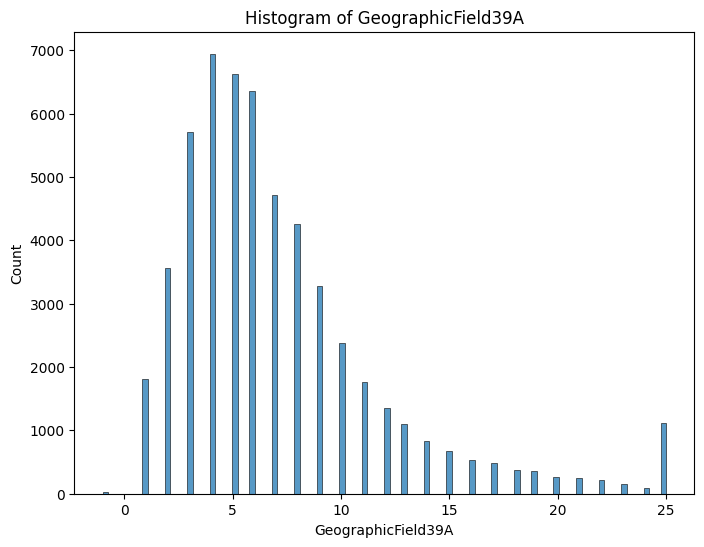

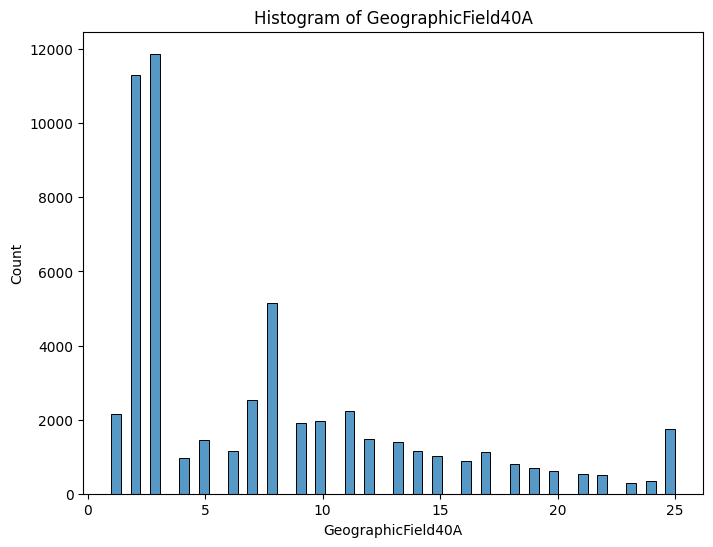

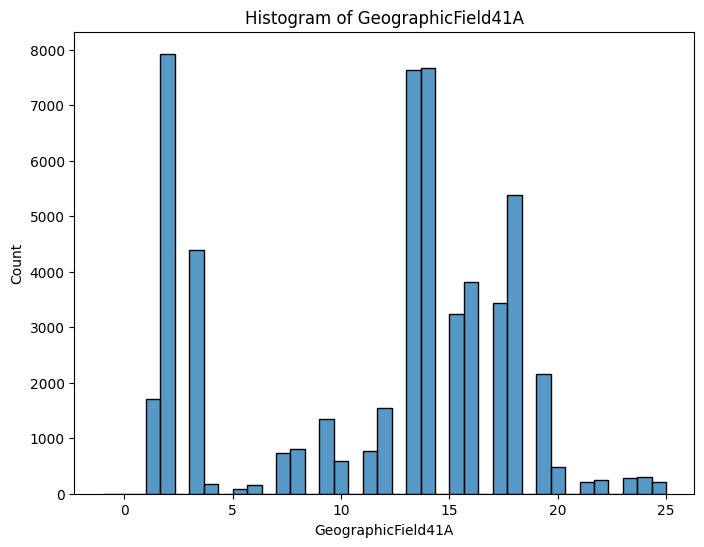

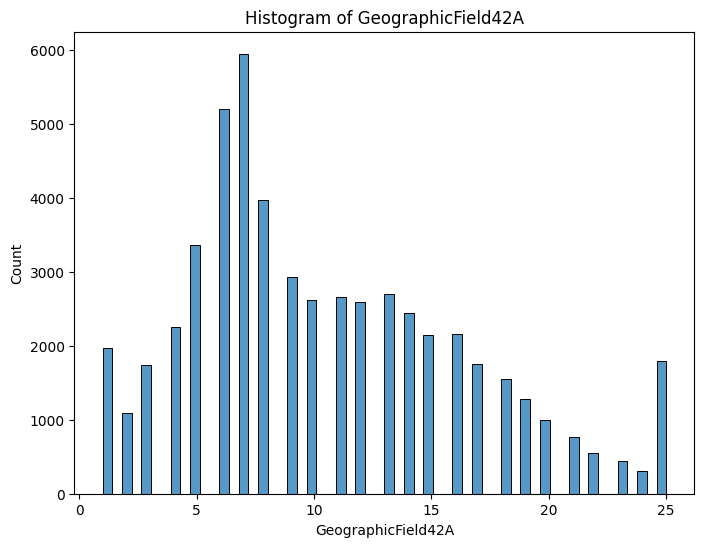

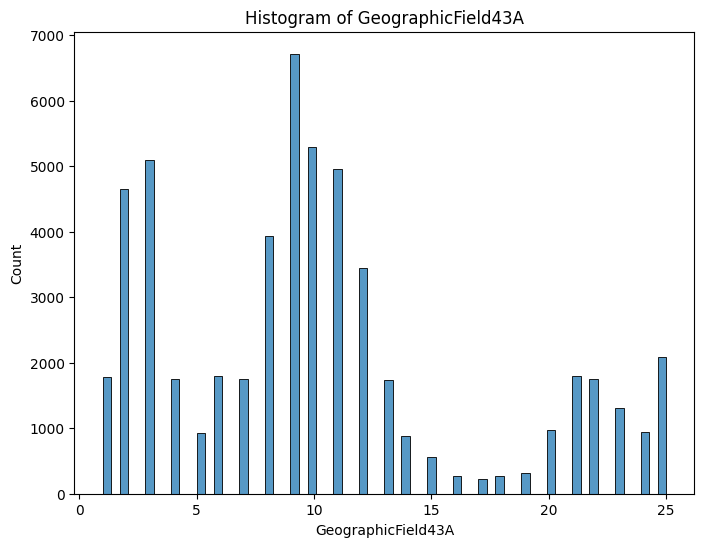

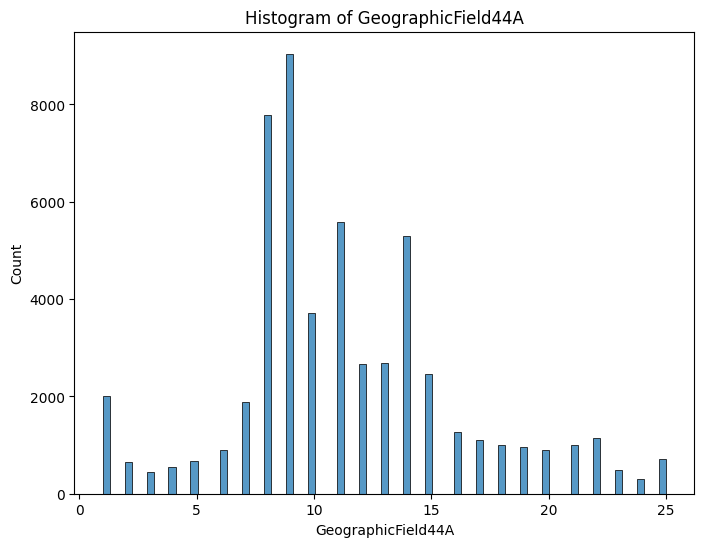

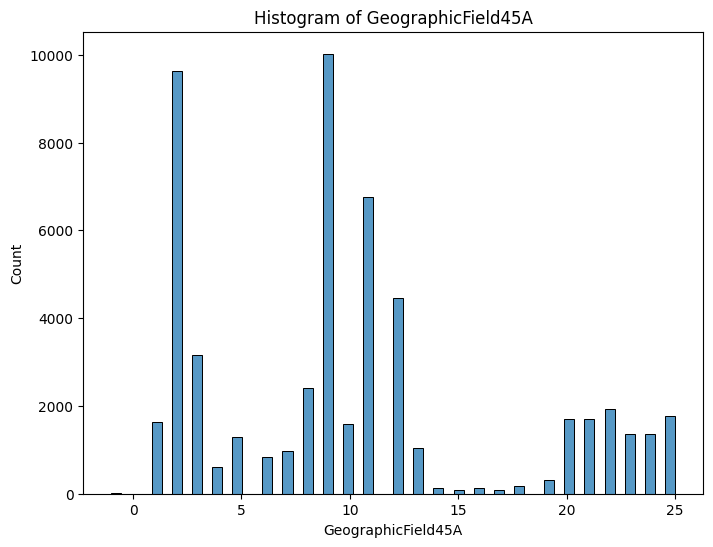

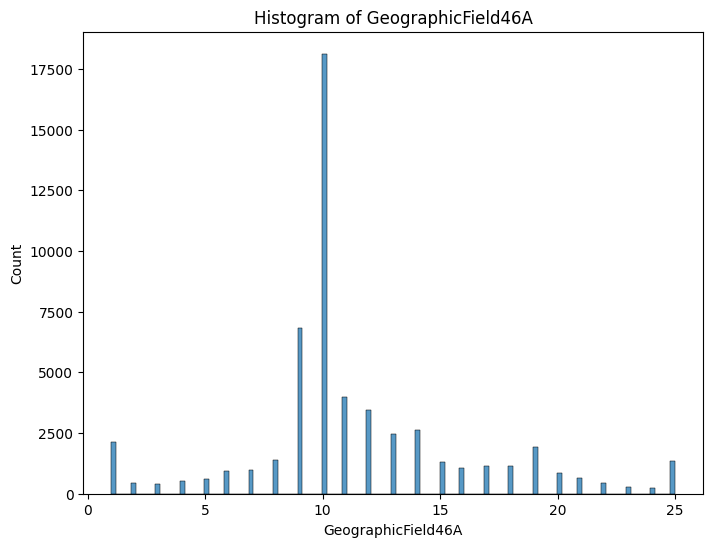

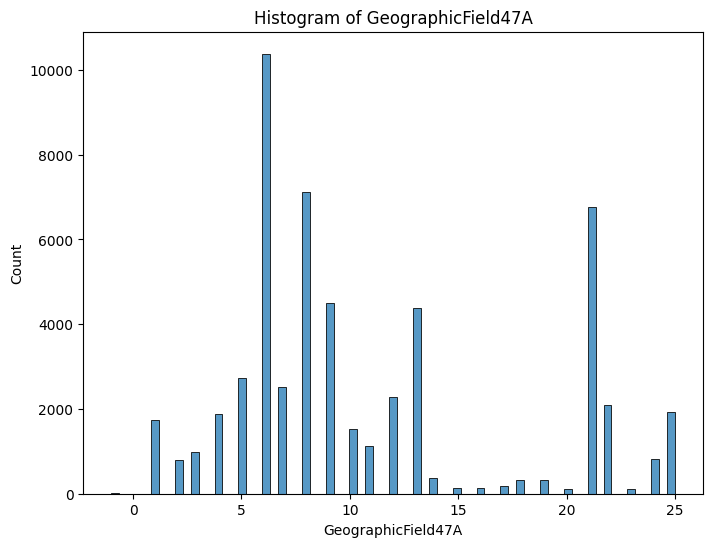

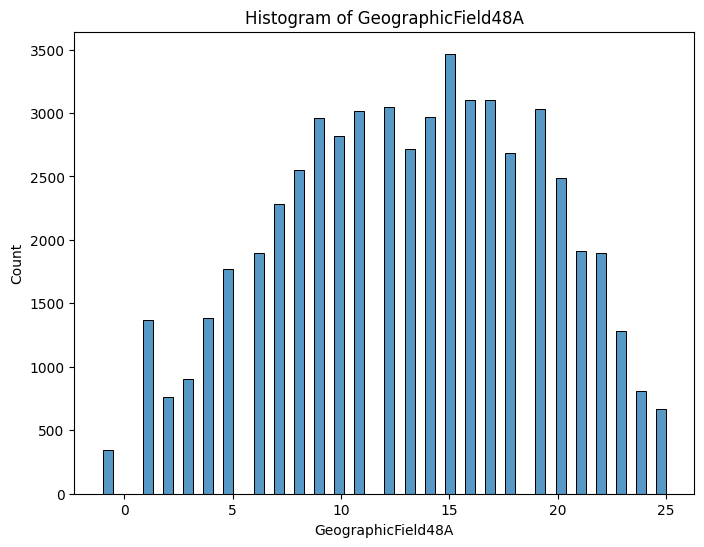

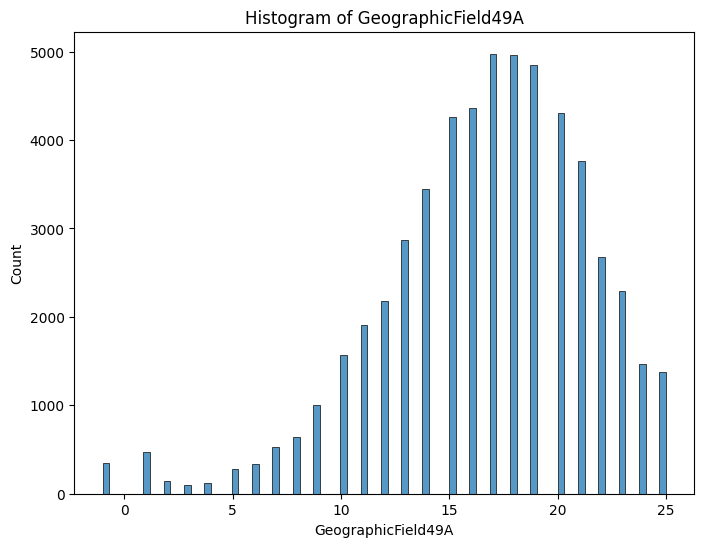

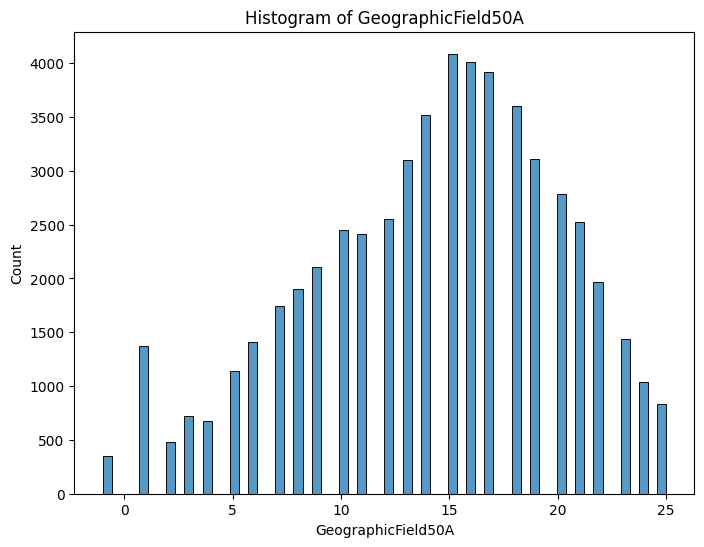

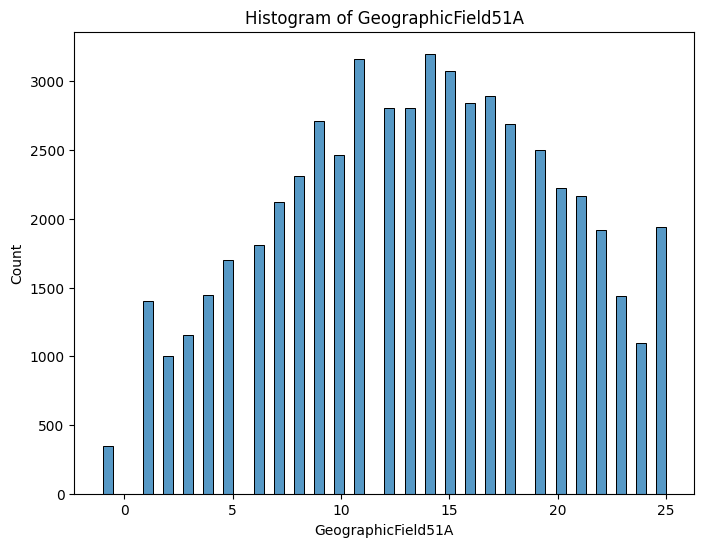

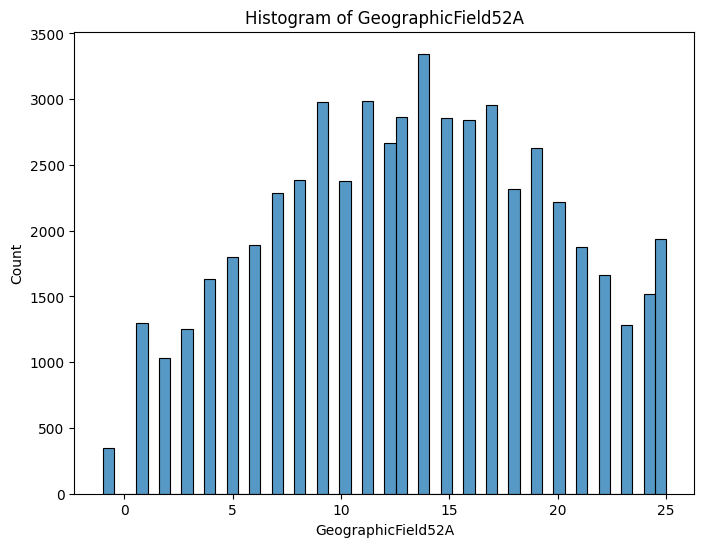

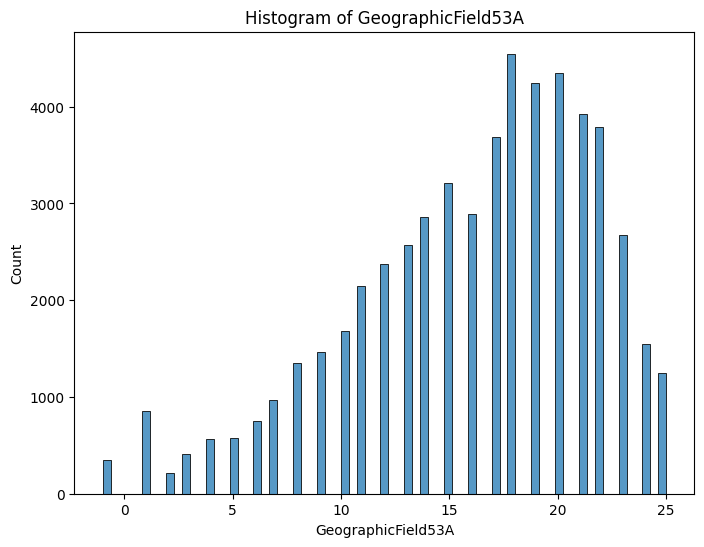

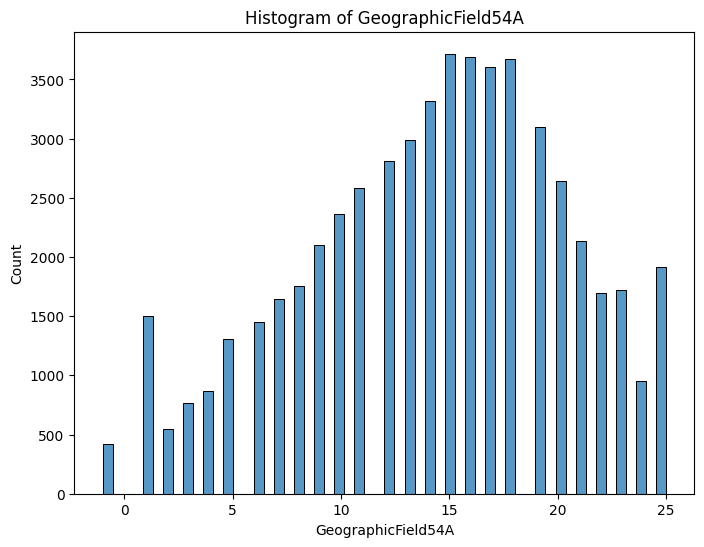

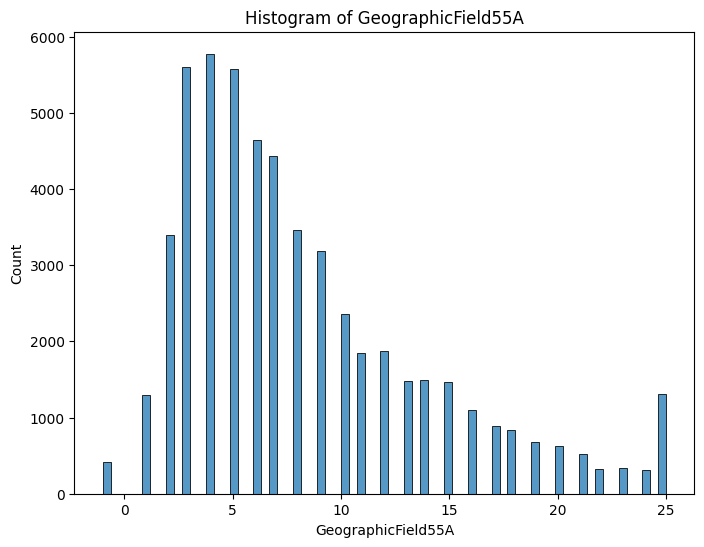

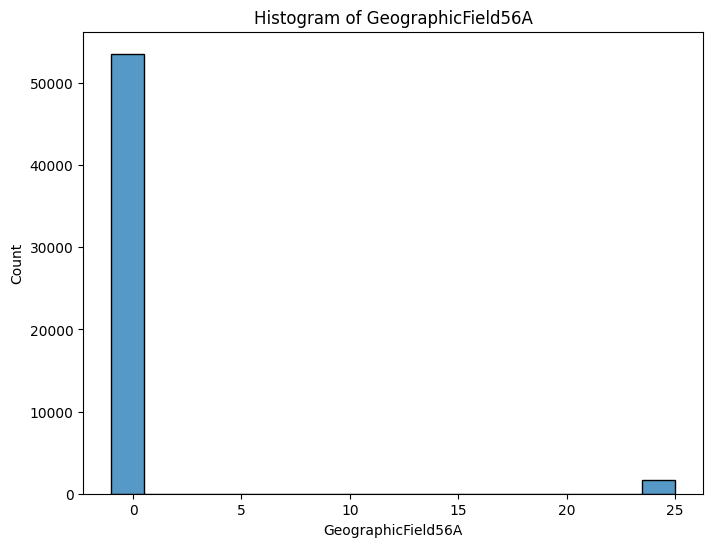

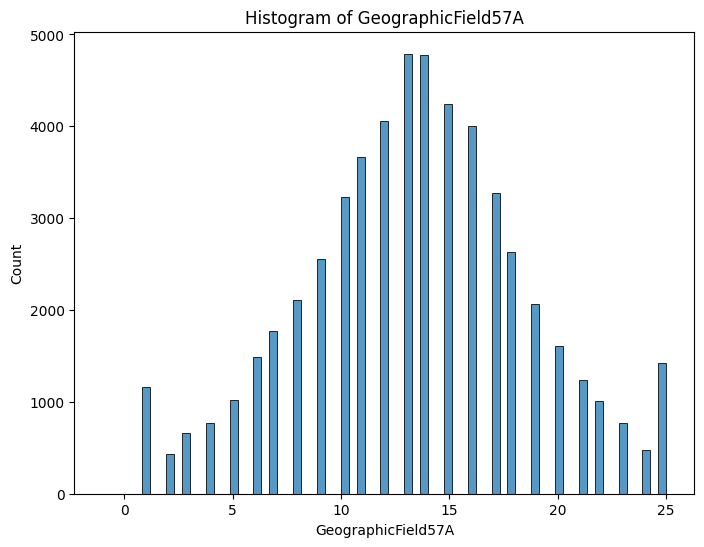

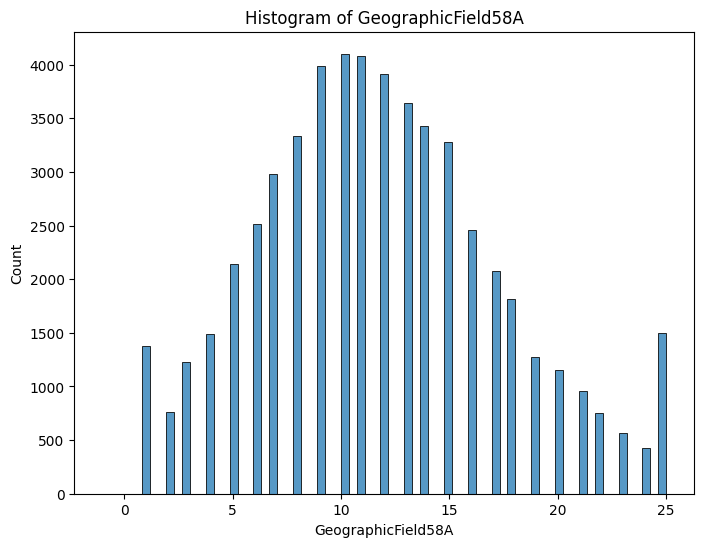

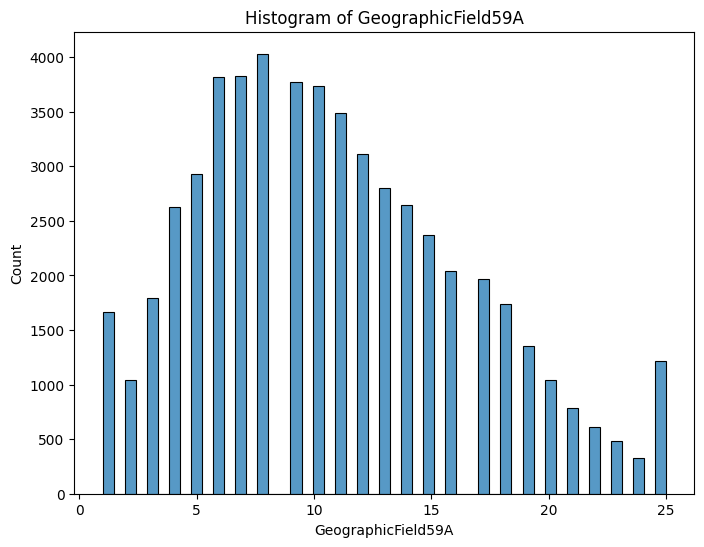

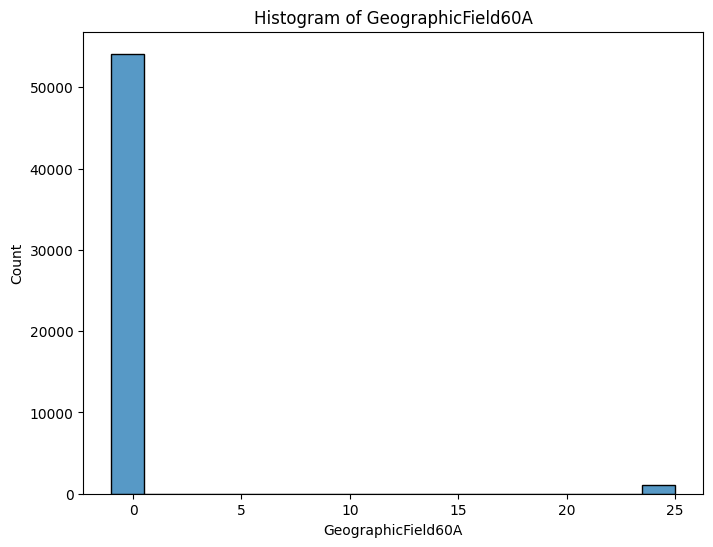

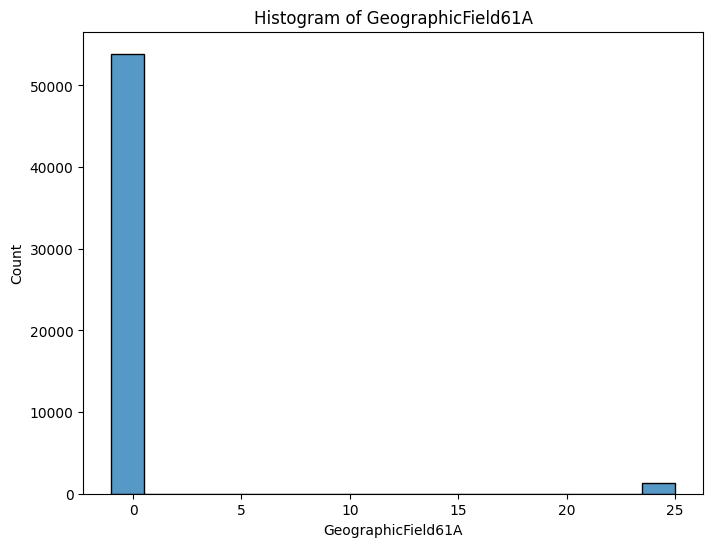

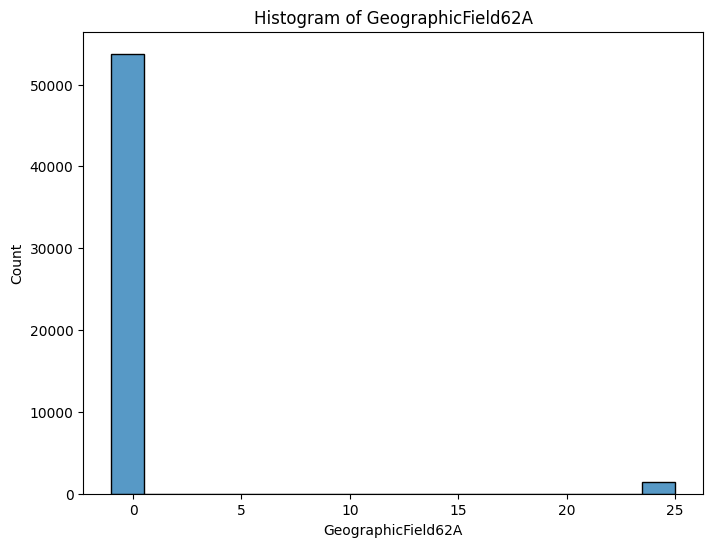

In [ ]:
for col in numerical_columns[::2]:
  plt.figure(figsize = (8, 6))
  sns.histplot(df_train[col])
  plt.title('Histogram of {}'.format(col))
  plt.show()

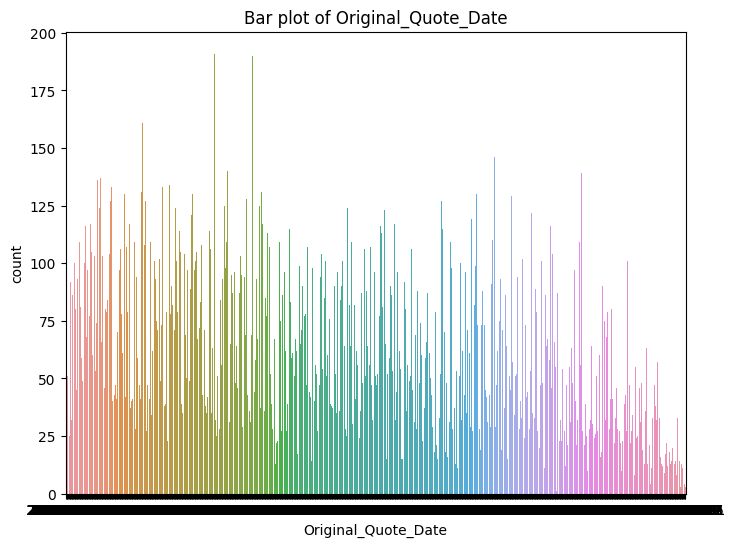

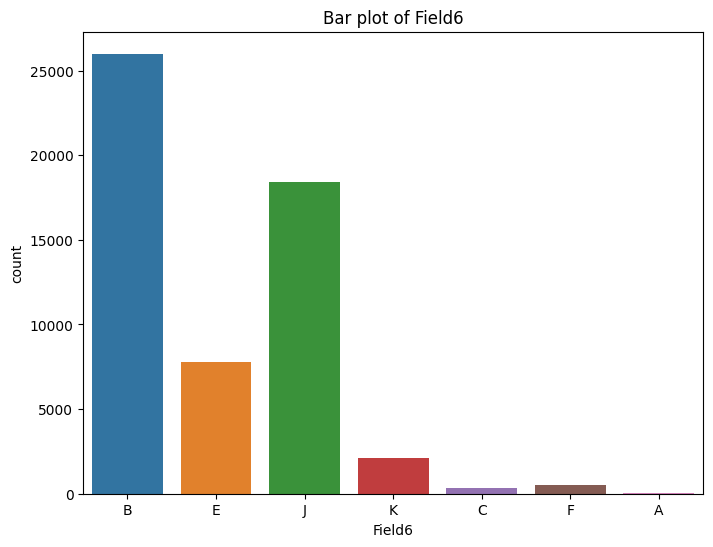

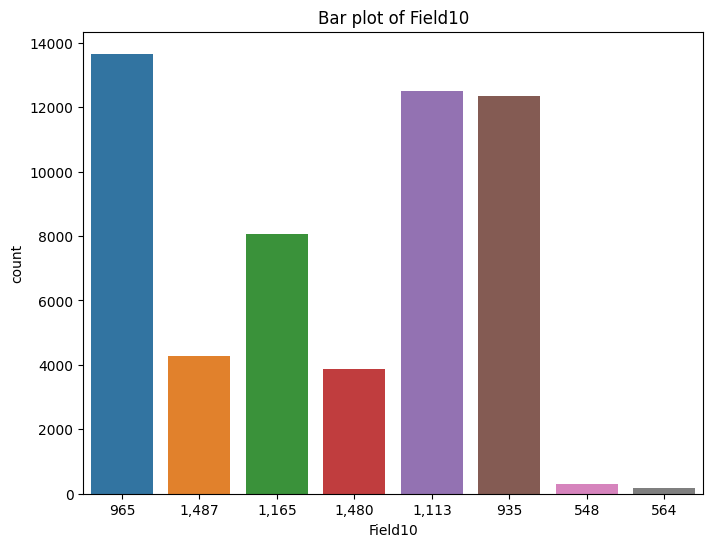

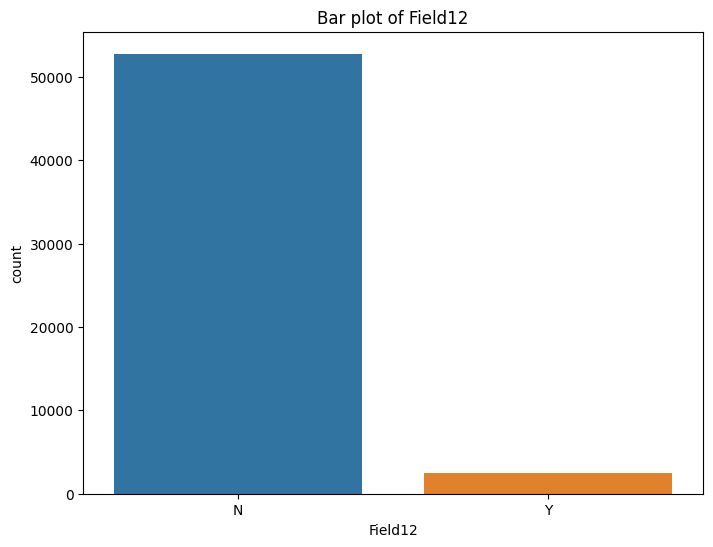

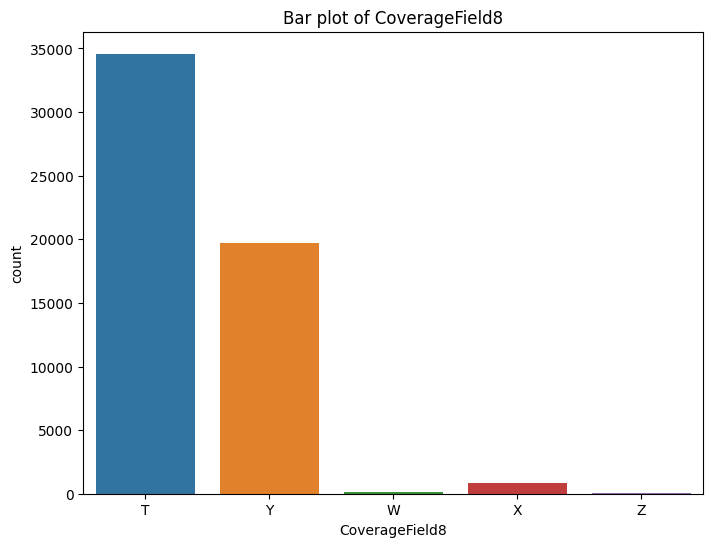

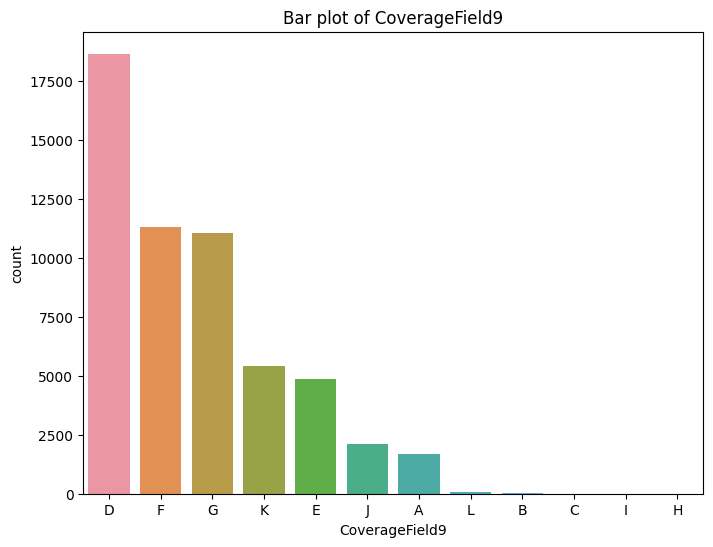

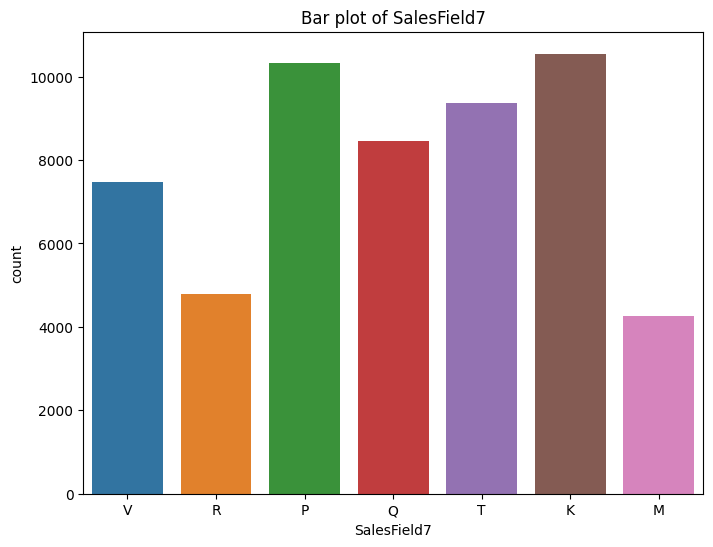

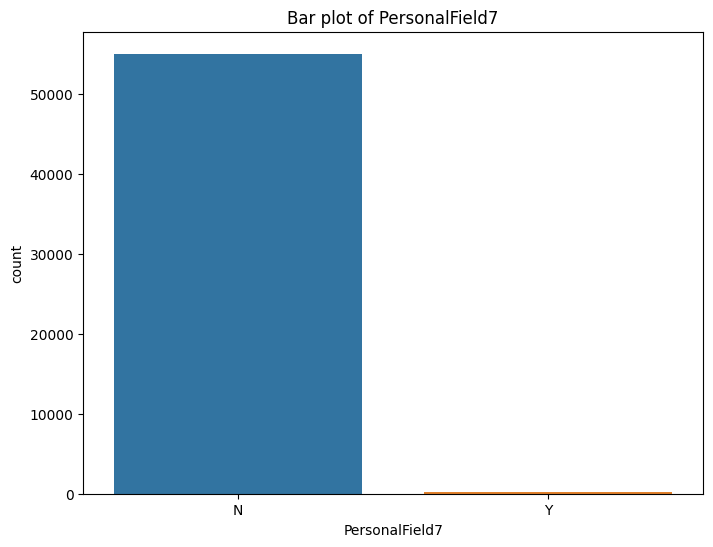

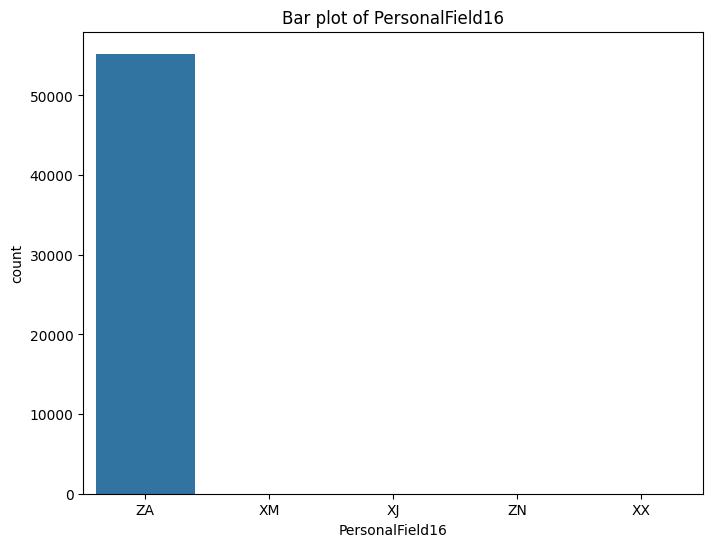

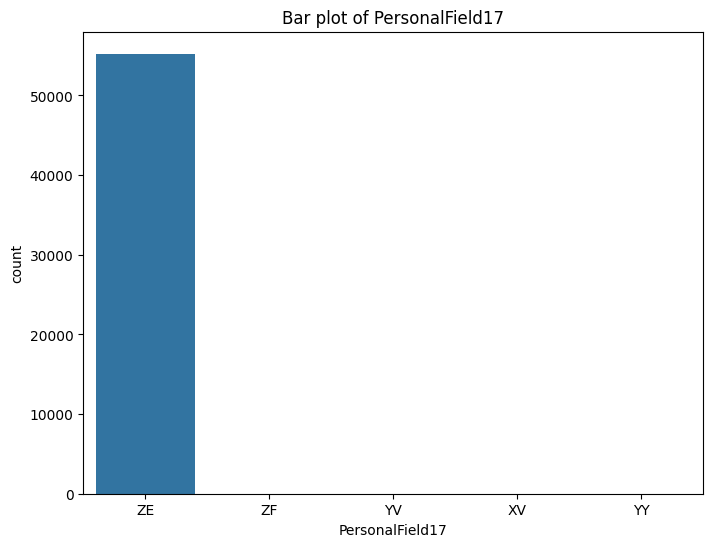

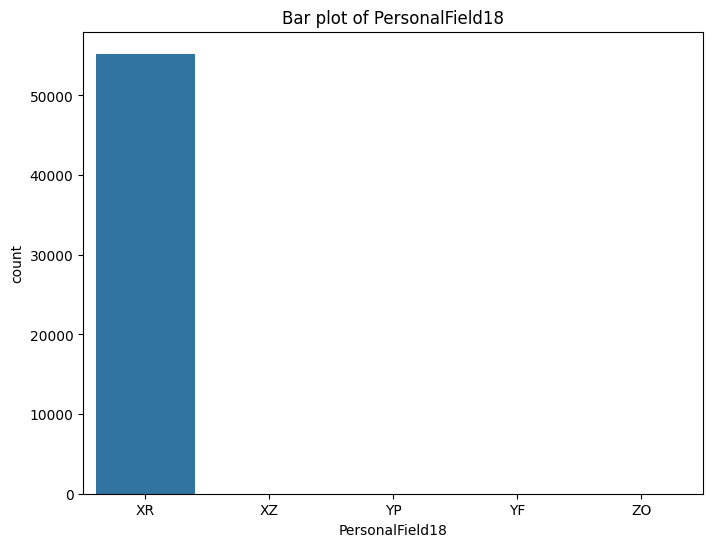

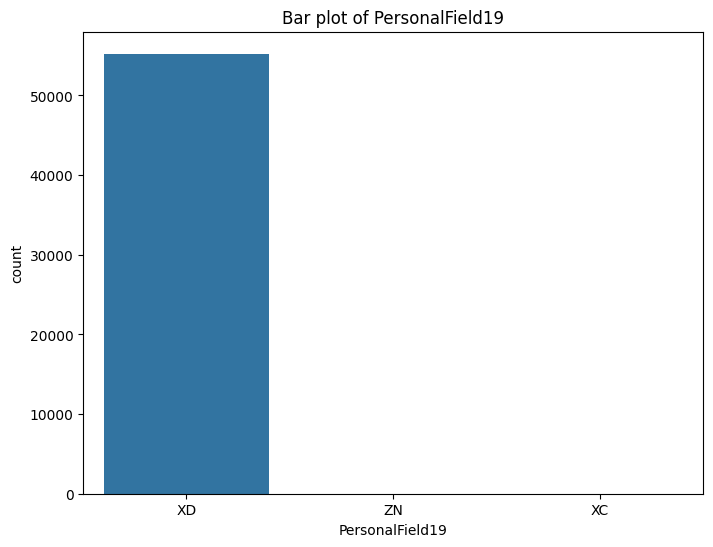

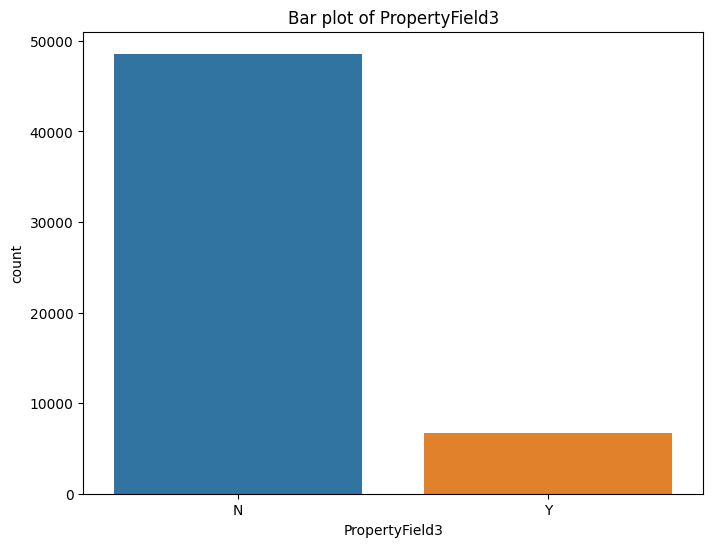

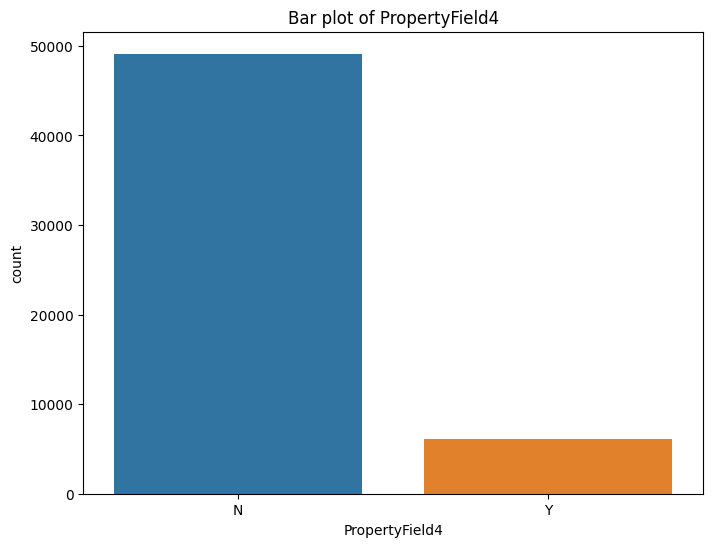

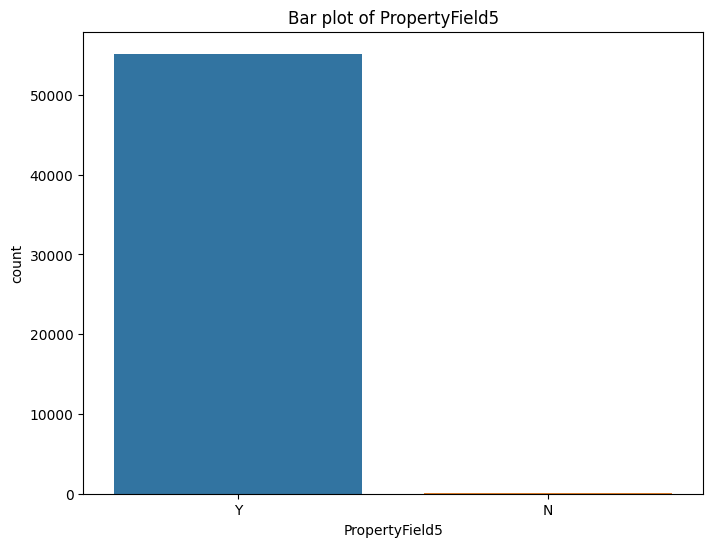

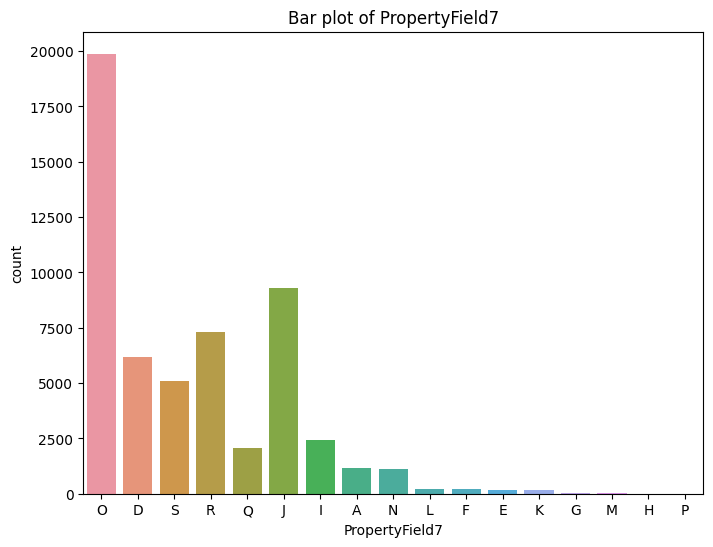

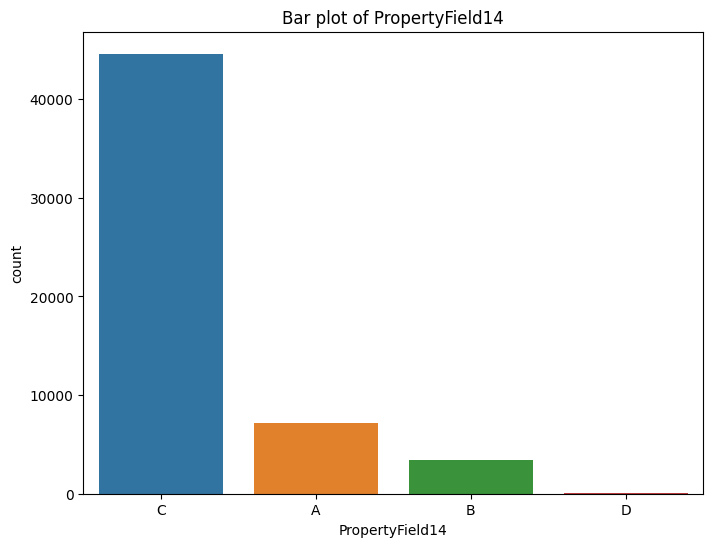

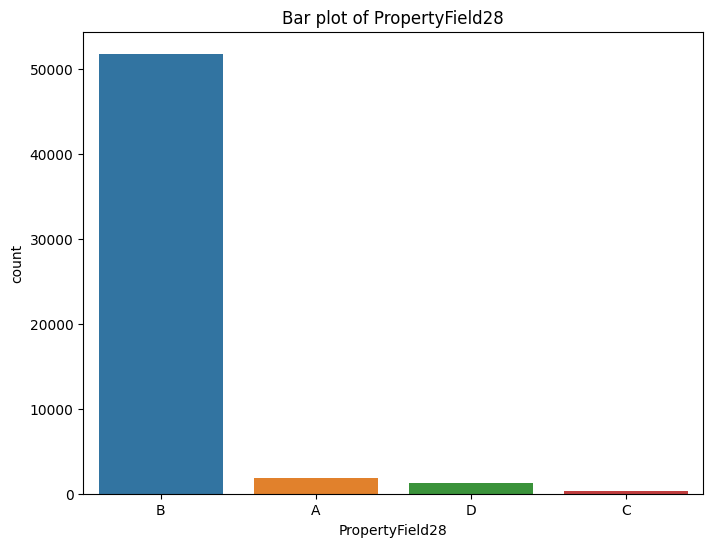

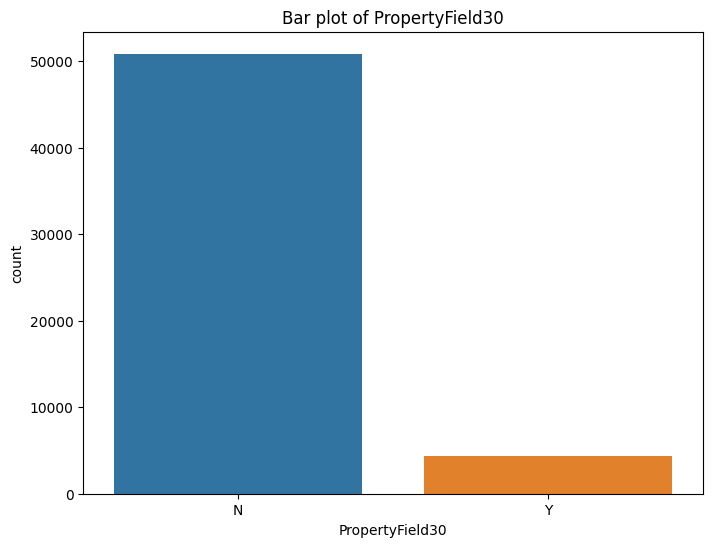

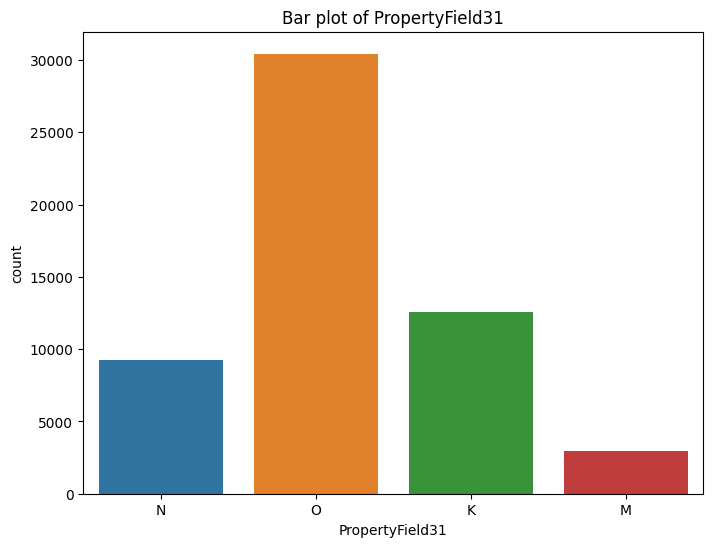

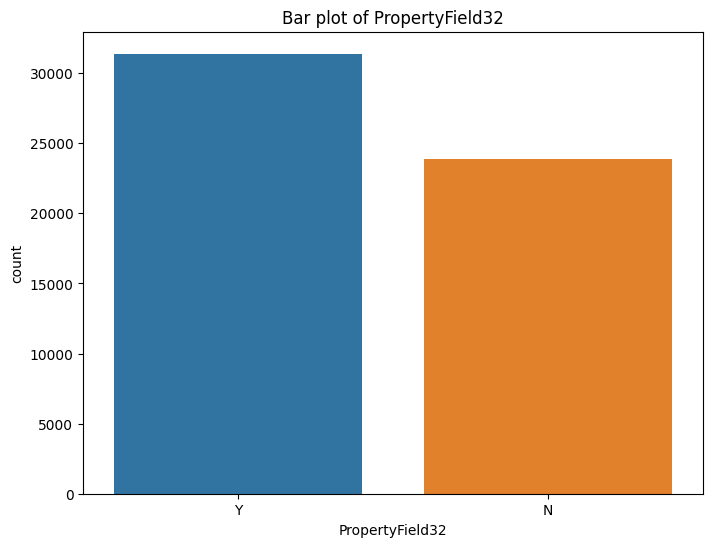

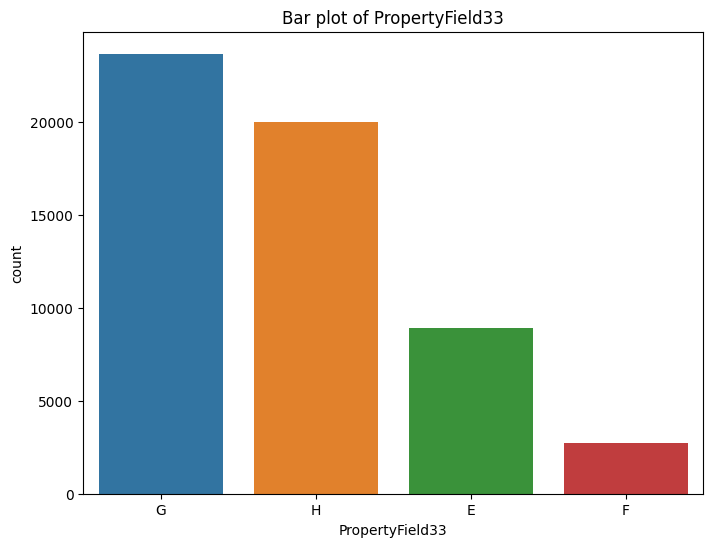

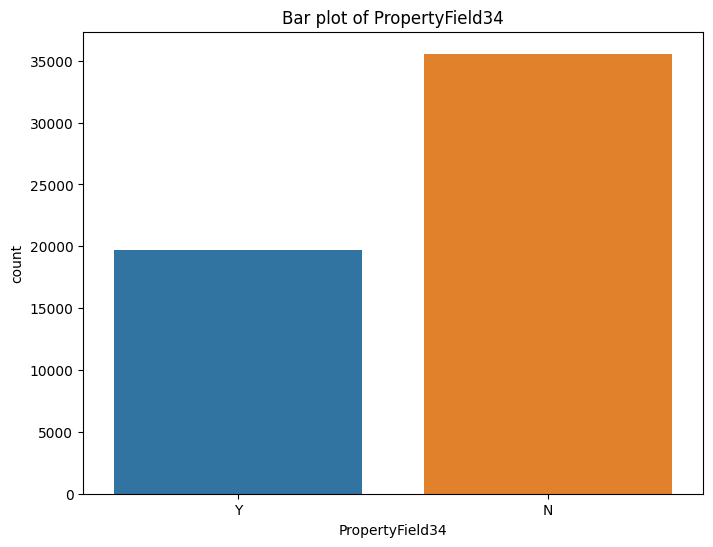

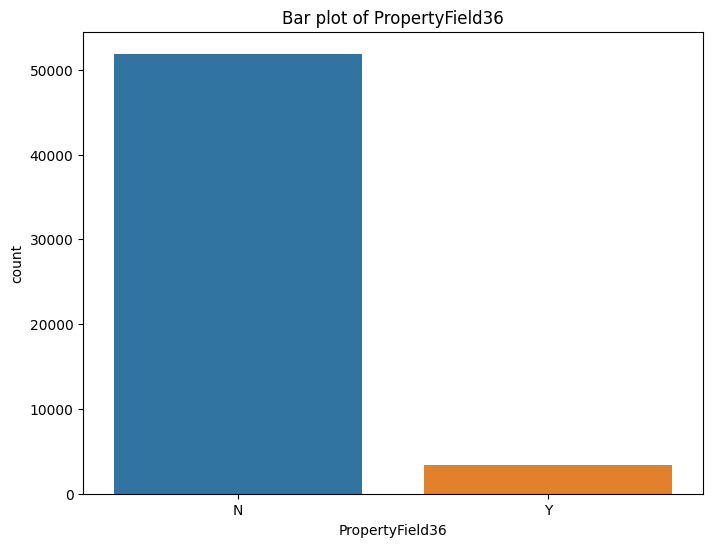

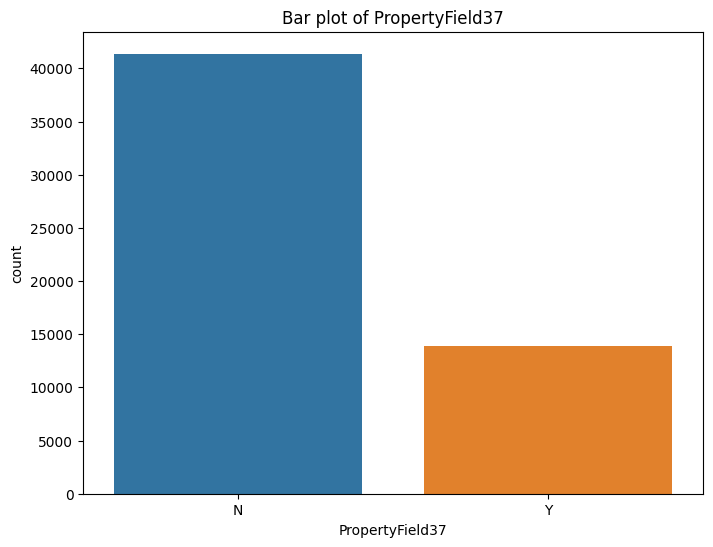

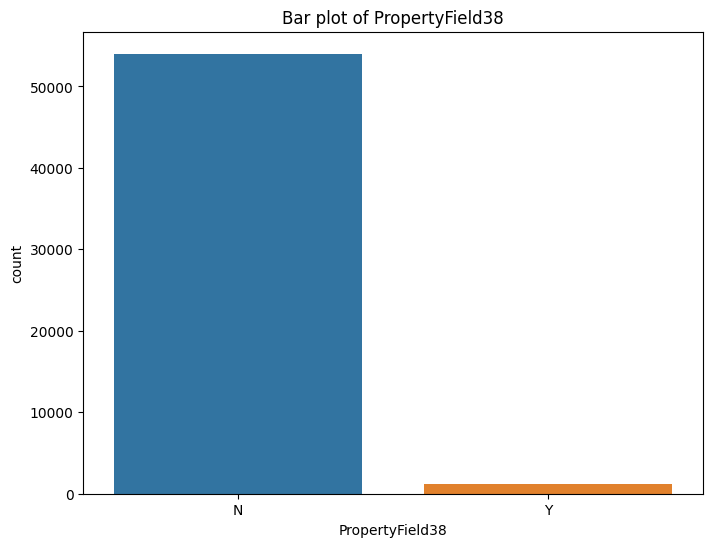

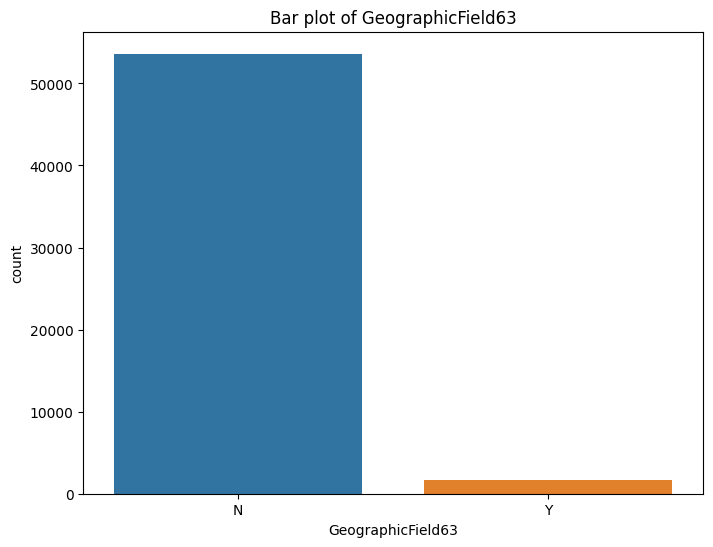

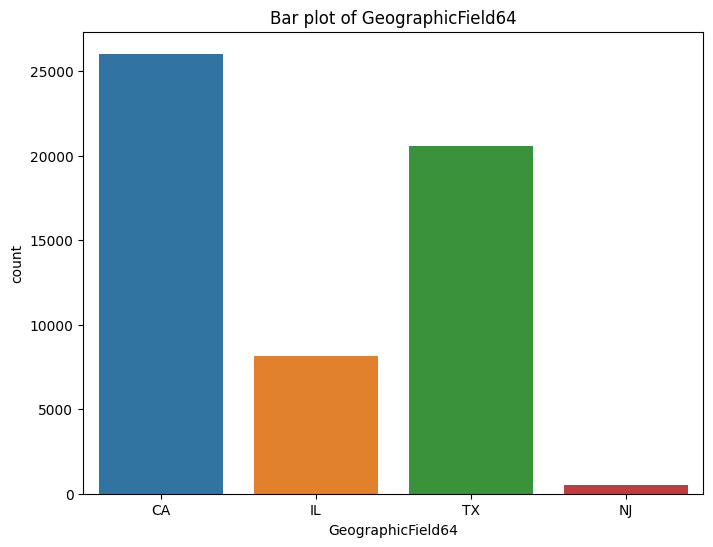

In [ ]:
for col in categorical_columns:
  plt.figure(figsize = (8, 6))
  sns.countplot(x = col, data = df_train)
  plt.title('Bar plot of {}'.format(col))
  plt.show()

# Encoding the Data

In [ ]:
target = 'QuoteConversion_Flag'

y_train = df_train[target]
X_train = df_train.drop(target, axis=1)
X_test = df_test

X_train = X_train.dropna(axis=1)

categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Encode categorical columns using Label Encoding
for col in categorical_columns:
    # Combine train and test data to ensure consistent encoding
    combined_data = pd.concat([X_train[col], X_test[col]]).astype('category')
    combined_data = combined_data.cat.codes

    # Update train and test data with encoded values
    X_train[col] = combined_data[:len(X_train)]
    X_test[col] = combined_data[len(X_train):]

In [ ]:
X_train.head()

Original_Quote_Date  Field6  Field7  Field8  Field9  Field10  Field11  \
0                  227       1      23  0.9403  0.0006        7   1.0200   
1                  389       3      23  0.9472  0.0006        3   1.3045   
2                  304       5      23  0.9258  0.0004        1   1.2665   
3                  161       1      23  0.9403  0.0006        7   1.0200   
4                  168       3      23  0.9485  0.0006        2   1.3045   

   Field12  CoverageField1A  CoverageField1B  ...  GeographicField59A  \
0        0               17               23  ...                   9   
1        0                8               13  ...                  18   
2        0               16               23  ...                  18   
3        0                8               14  ...                   9   
4        0                5                7  ...                  13   

   GeographicField59B  GeographicField60A  GeographicField60B  \
0                   9                  -1                   8   
1                  22                  -1                  10   
2                  22                  -1                  19   
3                   9                  -1                  14   
4                  16                  -1                   1   

   GeographicField61A  GeographicField61B  GeographicField62A  \
0                  -1                  18                  -1   
1                  -1                  11                  -1   
2                  -1                  13                  -1   
3                  -1                   7                  -1   
4                  -1                   8                  -1   

   GeographicField62B  GeographicField63  GeographicField64  
0                  10                  1                  0  
1                  12                  1                  1  
2                   8                  1                  3  
3                   8                  1                  0  
4                   8                  1                  1  

[5 rows x 297 columns]

In [ ]:
X_test.head()

Original_Quote_Date  Field6  Field7  Field8  Field9  Field10  Field11  \
0                  573       3      23  0.9392  0.0006        3   1.3045   
1                  512       5      23  0.8928  0.0004        0   1.2665   
2                  317       1      23  0.9403  0.0006        7   1.0200   
3                  431       3      23  0.9392  0.0006        3   1.3045   
4                  265       1      23  0.9403  0.0006        7   1.0200   

   Field12  CoverageField1A  CoverageField1B  ...  GeographicField59A  \
0        0                5                6  ...                  11   
1        0               12               20  ...                   7   
2        0                5                7  ...                   8   
3        0                9               16  ...                  13   
4        0               13               20  ...                   3   

   GeographicField59B  GeographicField60A  GeographicField60B  \
0                  12                  -1                   7   
1                   7                  -1                  12   
2                   7                  -1                  12   
3                  16                  -1                  16   
4                   2                  -1                   8   

   GeographicField61A  GeographicField61B  GeographicField62A  \
0                  -1                   4                  -1   
1                  -1                   5                  -1   
2                  -1                   9                  -1   
3                  -1                  16                  -1   
4                  -1                  16                  -1   

   GeographicField62B  GeographicField63  GeographicField64  
0                   8                  1                  1  
1                   8                  1                  3  
2                   8                  1                  0  
3                   8                  1                  1  
4                  24                  1                  0  

[5 rows x 297 columns]

In [ ]:
# Contains truth variable for training data
y_train.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: QuoteConversion_Flag, dtype: int64

In [ ]:
# Uploading Dataframes as CSV to use 

X_train.to_csv('X_train.csv', index = False)
!cp X_train.csv "drive/My Drive/"

X_test.to_csv('X_test.csv', index = False)
!cp X_test.csv "drive/My Drive/"

y_train.to_csv('y_train.csv', index = False)
!cp y_train.csv "drive/My Drive/"